In [484]:
#Deep Learning

In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("data\\smart_grid_stability_augmented.csv")
df.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [10]:

df.shape

(60000, 14)

In [12]:
#Data Cleaning


In [14]:

df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [16]:
#Data Preprocessing

In [18]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['stabf'] = l.fit_transform(df['stabf'])


In [22]:

df.value_counts('stabf')

stabf
1    38280
0    21720
Name: count, dtype: int64

In [24]:
#Splitting data into training and test data

In [26]:
x = df.drop('stabf',axis = 1)
y = df['stabf']
print(x.shape)
print(y.shape)


(60000, 13)
(60000,)


In [28]:
from sklearn.model_selection import train_test_split


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(45000, 13)
(45000,)
(15000, 13)
(15000,)


In [34]:
#Model Implimentation


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
#1.Logistic Regression


In [40]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(max_iter = 1000)
m1.fit(x_train,y_train)
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))
ypred = m1.predict(x_test)
print(ypred)
cm = confusion_matrix(y_test,ypred)
print('Confusion_Matrix\n',cm)
print('Classification Report\n',classification_report(y_test,ypred,zero_division=0))

Training score 0.96
Testing score 0.9580666666666666
[1 1 1 ... 1 1 1]
Confusion_Matrix
 [[5108  351]
 [ 278 9263]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      5459
           1       0.96      0.97      0.97      9541

    accuracy                           0.96     15000
   macro avg       0.96      0.95      0.95     15000
weighted avg       0.96      0.96      0.96     15000



In [42]:
cm = pd.DataFrame(data=confusion_matrix(y_test, ypred, labels=[0, 1]),
 index=["Actual Unstable", "Actual Stable"],
 columns=["Predicted Unstable", "Predicted Stable"])
cm


Predicted Unstable  Predicted Stable
Actual Unstable                5108               351
Actual Stable                   278              9263

In [44]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_test)* 100):.2f}%')

Accuracy per the confusion matrix: 95.81%


In [46]:
def plot_confusion_matrix(y_test, ypred):
 '''Plotting Confusion Matrix'''
 cm = metrics.confusion_matrix(y_test, ypred)
 ax = plt.subplot()
 ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
 ax.set_xlabel('Prediced labels', fontsize=18)
 ax.set_ylabel('True labels', fontsize=18)
 ax.set_title('Confusion Matrix', fontsize=25)
 ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
 ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
 plt.show()


In [105]:
 ''' Plotting Classification report'''
def clfr_plot(y_test, y_pred) :
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,output_dict=True)).T
#    cr=cr.drop(columns=['support'],axis=1,inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis

In [107]:
 '''
Loading [MathJax]/extensions/Safe.js
Decision Tree
 1) Ploting Confusion Matrix
 2) Plotting Classification Report'''
def clf_plot(y_pred) :
    cm = metrics.confusion_matrix(y_test, ypred)
    cr = pd.DataFrame(metrics.classification_report(y_test, ypred, digits=3, output_dict=True))
#    cr=cr.drop(columns=['support'],axis=1,inplace=True)
 
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
     
 # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good'])
 
 # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0)
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()


In [109]:

clf_plot(ypred)


In [111]:
#Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier


In [115]:
m2 = DecisionTreeClassifier(criterion='gini',min_samples_split=20,max_depth=13)
m2.fit(x_train,y_train)
print('Training score',m2.score(x_train,y_train))
print('Testing score',m2.score(x_test,y_test))
ypred = m2.predict(x_test)
print(ypred)
cm = confusion_matrix(y_test,ypred)
print('Confusion_Matrix\n',cm)
print('Classification Report\n',classification_report(y_test,ypred,zero_division=0))

Training score 1.0
Testing score 1.0
[1 1 1 ... 1 1 1]
Confusion_Matrix
 [[5459    0]
 [   0 9541]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5459
           1       1.00      1.00      1.00      9541

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [117]:
cm = pd.DataFrame(data=confusion_matrix(y_test, ypred, labels=[0, 1]),
 index=["Actual Unstable", "Actual Stable"],
 columns=["Predicted Unstable", "Predicted Stable"])
cm

Predicted Unstable  Predicted Stable
Actual Unstable                5459                 0
Actual Stable                     0              9541

In [119]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_test)* 100):.2f}%')

Accuracy per the confusion matrix: 100.00%


In [121]:
clf_plot(ypred)


In [123]:
#K Nearest Neighbor

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
m4 = KNeighborsClassifier(n_neighbors=21)
m4.fit(x_train,y_train)
print('Training score',m4.score(x_train,y_train))
print('Testing score',m4.score(x_test,y_test))
ypred = m4.predict(x_test)
print(ypred)
cm = confusion_matrix(y_test,ypred)
print('Confusion_Matrix\n',cm)
print('Classification Report\n',classification_report(y_test,ypred,zero_division=0))


Training score 0.8430666666666666
Testing score 0.8212
[0 1 1 ... 1 1 1]
Confusion_Matrix
 [[3686 1773]
 [ 909 8632]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.68      0.73      5459
           1       0.83      0.90      0.87      9541

    accuracy                           0.82     15000
   macro avg       0.82      0.79      0.80     15000
weighted avg       0.82      0.82      0.82     15000



In [129]:
cm = pd.DataFrame(data=confusion_matrix(y_test, ypred, labels=[0, 1]),
 index=["Actual Unstable", "Actual Stable"],
 columns=["Predicted Unstable", "Predicted Stable"])
cm

Predicted Unstable  Predicted Stable
Actual Unstable                3686              1773
Actual Stable                   909              8632

In [131]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_test)* 100):.2f}%')

Accuracy per the confusion matrix: 82.12%


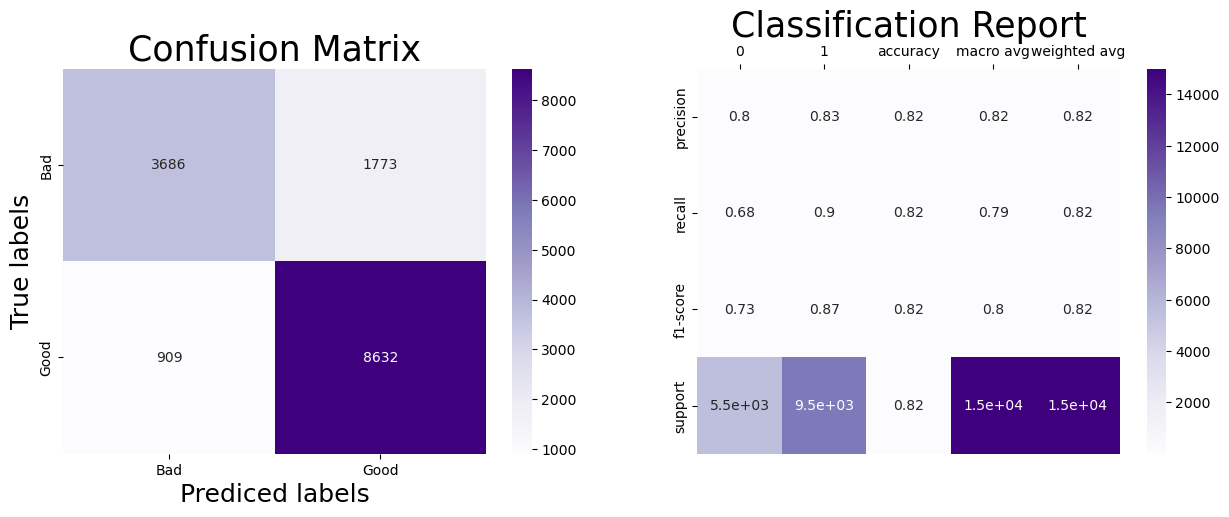

In [133]:
clf_plot(ypred)

In [135]:
#Artificial Neural Network

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import models


In [139]:
model = keras.models.Sequential([
 keras.layers.Dense(256,activation = 'relu',input_shape = [13]),
 keras.layers.Dense(128,activation = 'relu'),
 keras.layers.Dense(64,activation = 'relu'),
 keras.layers.Dense(32,activation = 'relu'),
 keras.layers.Dense(1,activation = 'sigmoid')
])

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
from tensorflow .keras import optimizers


In [147]:
model.compile(loss = 'binary_crossentropy',
 optimizer = optimizers.RMSprop(learning_rate=0.01),
 metrics = ['accuracy'])

In [149]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
history = model.fit(x_train,y_train,epochs = 30,validation_data = (x_test,y_test))

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8012 - loss: 0.4648 - val_accuracy: 0.8949 - val_loss: 0.2528
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9346 - loss: 0.1633 - val_accuracy: 0.9721 - val_loss: 0.0787
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9530 - loss: 0.1239 - val_accuracy: 0.9695 - val_loss: 0.0654
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9594 - loss: 0.1051 - val_accuracy: 0.9740 - val_loss: 0.0594
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.0932 - val_accuracy: 0.8677 - val_loss: 0.3980
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.0852 - val_accuracy: 0.9167 - val_loss: 0.4411
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9730 - loss: 0.0814 - val_accuracy: 0.9661 - val_loss: 0.0758
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9724 - loss: 0.0791 - 

In [152]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.show()

In [155]:
#New Methodolgy

In [157]:
import numpy as np
import pandas as pd
import os
import glob
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, precision_score, f1_score, recall_score

#xgboost
import xgboost

#lightgbm
import lightgbm

In [159]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores




def train_models(models, x_data, y_data, train_size, save=False, preprocessor=None):
    
    if type(x_data) == pd.core.frame.DataFrame or type(x_data) == pd.core.series.Series:
        x_data = x_data.to_numpy()
    
    if type(y_data) == pd.core.frame.DataFrame or type(y_data) == pd.core.series.Series:
        y_data = y_data.to_numpy(dtype=np.float64)
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = train_size, shuffle=True)
    
    trained_models = []
    cms = []
    
    accuracies = []
    maes = []
    precisions = []
    recalls = []
    f1s = []
    
    
    for key in models:
        print(f'using model: {key}')
        start = time.time()
        
        if preprocessor==None:
            pipe = Pipeline([
                (key, models[key])
            ])
            
        else:
            pipe = Pipeline([
                    ('Preprocessor', preprocessor),
                    (key, models[key])
                    ])
        
        pipe.fit(x_train, y_train)
        preds = pipe.predict(x_test)
        accuracy = pipe.score(x_test, y_test)
        mae = mean_absolute_error(y_test, preds)
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        
        
        if save:
            joblib.dump(pipe, key+'.pkl')
        trained_models.append(pipe)
        cms.append(confusion_matrix(y_test, preds))
        
        accuracies.append(accuracy)
        maes.append(mae)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        
        end = time.time()
        print(f'Accuracy: {accuracy:.4f} ; MAE: {mae:.4f} ; Precision: {precision:.4f} ; Recall: {recall:.4f} ; F1: {f1:.4f} \t finished in {(end-start):.4f} second(s)\n')
        
    return trained_models, cms, [accuracies, maes, precisions, recalls, f1s]

In [161]:
#List of models to use

In [163]:
models = {
    'Logistic Regression' : linear_model.LogisticRegression(),
    'Ridge Classifier' : linear_model.RidgeClassifier(),
    'SGD classifier' : linear_model.SGDClassifier(),
    'Passive Aggressive Classifier' : linear_model.PassiveAggressiveClassifier(),
    'Linear Discriminant Analysis' : LinearDiscriminantAnalysis(store_covariance=True),
    'Quadratic Discriminant Analysis' : QuadraticDiscriminantAnalysis(store_covariance=True),
    'Suport Vector Classifier' : svm.SVC(),
    'Linear Support Vector Classifier' : svm.LinearSVC(),
    'KNeighbors Classifier' : neighbors.KNeighborsClassifier(n_neighbors=11),
    'Gaussian Naive Bayes' : naive_bayes.GaussianNB(),
    'Decision Tree Classifier' : tree.DecisionTreeClassifier(),
    'Hist Gradient Boosting Classifier' : ensemble.HistGradientBoostingClassifier(),
    'Gradient Boosting Classifier' : ensemble.GradientBoostingClassifier(),
    'Random Forest Classifier' : ensemble.RandomForestClassifier(n_estimators=200),
    'Bagging Classifier' : ensemble.BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    'Voting Classifier' : ensemble.VotingClassifier(estimators=[('lr', linear_model.LogisticRegression()),
                                               ('rf', ensemble.RandomForestClassifier(n_estimators=200)),
                                               ('gnb', naive_bayes.GaussianNB())], 
                                               voting='hard'),
    'AdaBoost Classifier' : ensemble.AdaBoostClassifier(n_estimators=200),
    'XGBoost Classifier' : xgboost.XGBClassifier(n_estimators = 1000, max_depth = 200, learning_rate=1.0, objective='binary:logistic'),
    'LightGBM Classifier' : lightgbm.LGBMClassifier(n_estimators=1000)
    
    }

In [165]:
data_csv= pd.read_csv("data\\smart_grid_stability_augmented.csv")
data_csv.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [167]:
classes = {0: 'unstable', 1: 'stable'}
print(f'number of entries in the dataset: {len(data_csv)}')

number of entries in the dataset: 60000


In [169]:
new_csv = data_csv.copy()
new_csv.loc[new_csv['stabf'] == 'unstable', 'stabf'] = 0
new_csv.loc[new_csv['stabf'] == 'stable', 'stabf'] = 1

In [171]:
x_data = new_csv.drop(['stab','stabf'], axis=1)
standard_x = preprocessing.StandardScaler().fit_transform(x_data)
standard_x = pd.DataFrame(standard_x, columns=x_data.columns)
y_data = new_csv['stabf']

In [173]:
model_scores_dict = {}

In [175]:
score_names = ['Accuracy', 'MAE', 'Precision', 'Recall', 'F1']

In [177]:
def make_scores_table(scores):
    scores_dict = {}
    for i in range(len(scores)):
        scores_dict[score_names[i]] = scores[i]
    return pd.DataFrame(scores_dict, index=list(models.keys()))

In [179]:
preprocessor = preprocessing.StandardScaler()
trained_models, cms, scores = train_models(models, x_data, y_data, train_size=0.9, save=False, preprocessor=preprocessor)
model_scores_dict['Standard Training'] = [f'{s*100:.2f}%' for s in scores[0]]
standard_training_table = make_scores_table(scores)
standard_training_table.to_csv('standard training.csv')

using model: Logistic Regression
Accuracy: 0.8158 ; MAE: 0.1842 ; Precision: 0.7761 ; Recall: 0.7050 ; F1: 0.7388 	 finished in 0.0407 second(s)

using model: Ridge Classifier
Accuracy: 0.8147 ; MAE: 0.1853 ; Precision: 0.7761 ; Recall: 0.7005 ; F1: 0.7364 	 finished in 0.0485 second(s)

using model: SGD classifier
Accuracy: 0.8120 ; MAE: 0.1880 ; Precision: 0.7624 ; Recall: 0.7136 ; F1: 0.7372 	 finished in 0.1946 second(s)

using model: Passive Aggressive Classifier
Accuracy: 0.7922 ; MAE: 0.2078 ; Precision: 0.7574 ; Recall: 0.6437 ; F1: 0.6959 	 finished in 0.0594 second(s)

using model: Linear Discriminant Analysis
Accuracy: 0.8157 ; MAE: 0.1843 ; Precision: 0.7751 ; Recall: 0.7059 ; F1: 0.7389 	 finished in 0.0753 second(s)

using model: Quadratic Discriminant Analysis
Accuracy: 0.8773 ; MAE: 0.1227 ; Precision: 0.8555 ; Recall: 0.8038 ; F1: 0.8288 	 finished in 0.0486 second(s)

using model: Suport Vector Classifier


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.9797 ; MAE: 0.0203 ; Precision: 0.9807 ; Recall: 0.9639 ; F1: 0.9722 	 finished in 21.6704 second(s)

using model: Linear Support Vector Classifier


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8157 ; MAE: 0.1843 ; Precision: 0.7757 ; Recall: 0.7050 ; F1: 0.7387 	 finished in 1.6456 second(s)

using model: KNeighbors Classifier
Accuracy: 0.8987 ; MAE: 0.1013 ; Precision: 0.9236 ; Recall: 0.7912 ; F1: 0.8523 	 finished in 5.3505 second(s)

using model: Gaussian Naive Bayes
Accuracy: 0.8338 ; MAE: 0.1662 ; Precision: 0.8423 ; Recall: 0.6770 ; F1: 0.7507 	 finished in 0.0328 second(s)

using model: Decision Tree Classifier
Accuracy: 0.9005 ; MAE: 0.0995 ; Precision: 0.8616 ; Recall: 0.8705 ; F1: 0.8661 	 finished in 0.9425 second(s)

using model: Hist Gradient Boosting Classifier
Accuracy: 0.9628 ; MAE: 0.0372 ; Precision: 0.9594 ; Recall: 0.9391 ; F1: 0.9492 	 finished in 0.9264 second(s)

using model: Gradient Boosting Classifier
Accuracy: 0.9330 ; MAE: 0.0670 ; Precision: 0.9468 ; Recall: 0.8674 ; F1: 0.9054 	 finished in 26.2488 second(s)

using model: Random Forest Classifier
Accuracy: 0.9510 ; MAE: 0.0490 ; Precision: 0.9483 ; Recall: 0.9175 ; F1: 0.9326 	 fini

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8613 ; MAE: 0.1387 ; Precision: 0.8386 ; Recall: 0.7736 ; F1: 0.8048 	 finished in 19.2360 second(s)

using model: XGBoost Classifier
Accuracy: 0.9865 ; MAE: 0.0135 ; Precision: 0.9859 ; Recall: 0.9774 ; F1: 0.9817 	 finished in 2.2126 second(s)

using model: LightGBM Classifier
[LightGBM] [Info] Number of positive: 19503, number of negative: 34497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361167 -> initscore=-0.570304
[LightGBM] [Info] Start training from score -0.570304
Accuracy: 0.9975 ; MAE: 0.0025 ; Precision: 0.9968 ; Recall: 0.9964 ; F1: 0.9966 	 finished in 2.0227 second(s)



In [180]:
standard_training_table

Accuracy       MAE  Precision    Recall  \
Logistic Regression                0.815833  0.184167   0.776068  0.705007   
Ridge Classifier                   0.814667  0.185333   0.776112  0.700496   
SGD classifier                     0.812000  0.188000   0.762410  0.713577   
Passive Aggressive Classifier      0.792167  0.207833   0.757431  0.643663   
Linear Discriminant Analysis       0.815667  0.184333   0.775136  0.705909   
Quadratic Discriminant Analysis    0.877333  0.122667   0.855497  0.803789   
Suport Vector Classifier           0.979667  0.020333   0.980725  0.963915   
Linear Support Vector Classifier   0.815667  0.184333   0.775682  0.705007   
KNeighbors Classifier              0.898667  0.101333   0.923644  0.791159   
Gaussian Naive Bayes               0.833833  0.166167   0.842312  0.677041   
Decision Tree Classifier           0.900500  0.099500   0.861607  0.870546   
Hist Gradient Boosting Classifier  0.962833  0.037167   0.959447  0.939107   
Gradient Boosting Classifier       0.933000  0.067000   0.946824  0.867388   
Random Forest Classifier           0.951000  0.049000   0.948252  0.917456   
Bagging Classifier                 0.838000  0.162000   0.907662  0.625169   
Voting Classifier                  0.846833  0.153167   0.844115  0.718088   
AdaBoost Classifier                0.861333  0.138667   0.838631  0.773568   
XGBoost Classifier                 0.986500  0.013500   0.985896  0.977447   
LightGBM Classifier                0.997500  0.002500   0.996841  0.996392   

                                         F1  
Logistic Regression                0.738832  
Ridge Classifier                   0.736368  
SGD classifier                     0.737185  
Passive Aggressive Classifier      0.695928  
Linear Discriminant Analysis       0.738905  
Quadratic Discriminant Analysis    0.828837  
Suport Vector Classifier           0.972247  
Linear Support Vector Classifier   0.738658  
KNeighbors Classifier              0.852284  
Gaussian Naive Bayes               0.750688  
Decision Tree Classifier           0.866053  
Hist Gradient Boosting Classifier  0.949168  
Gradient Boosting Classifier       0.905367  
Random Forest Classifier           0.932600  
Bagging Classifier                 0.740385  
Voting Classifier                  0.776018  
AdaBoost Classifier                0.804786  
XGBoost Classifier                 0.981653  
LightGBM Classifier                0.996616

<Figure size 640x480 with 0 Axes>

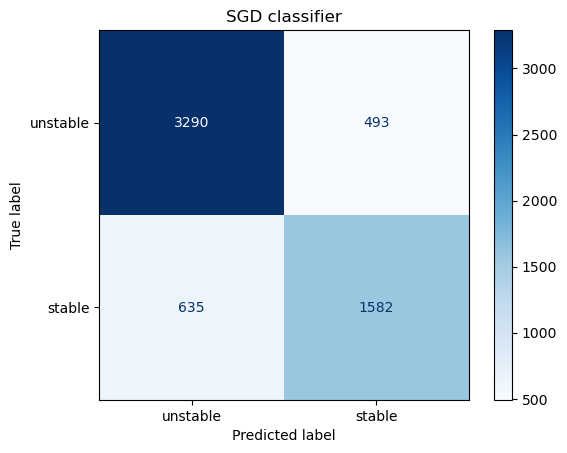

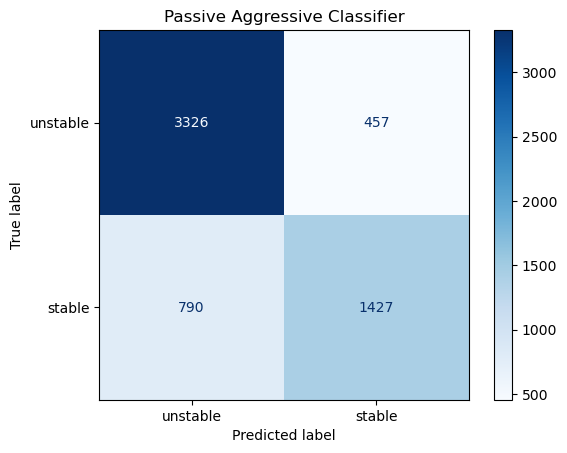

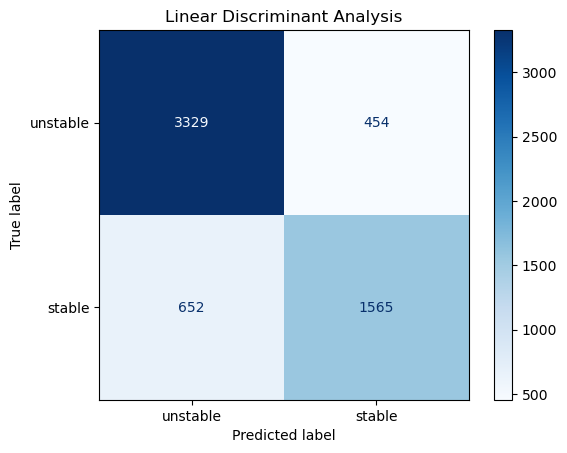

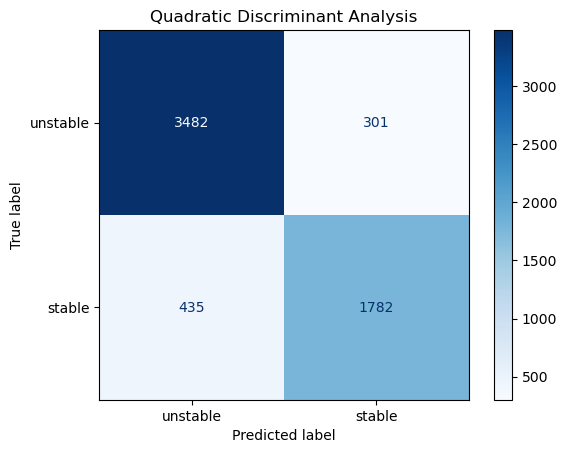

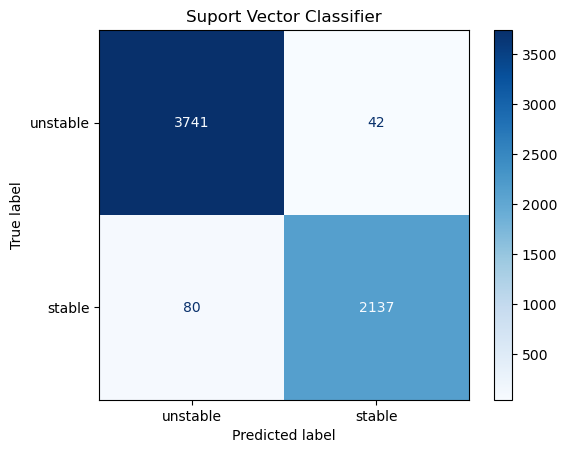

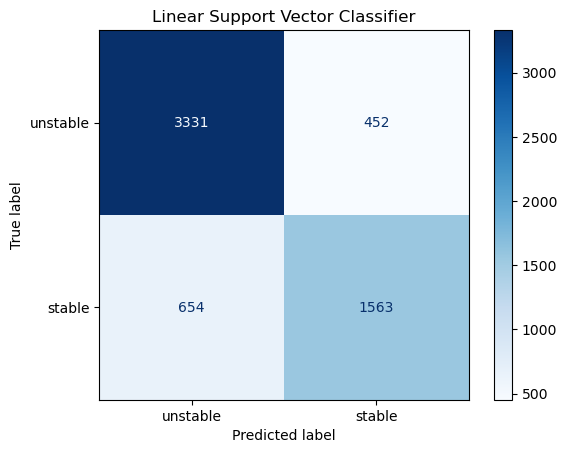

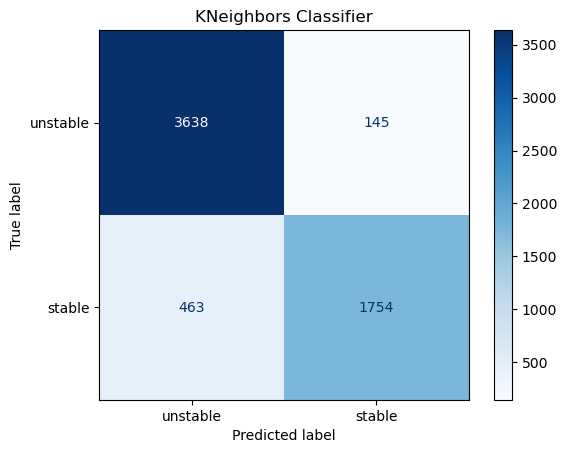

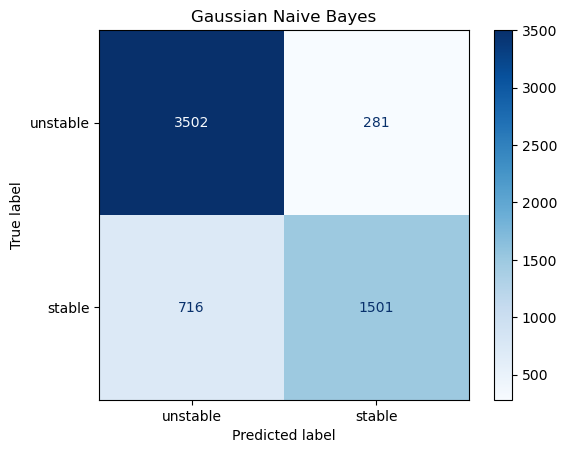

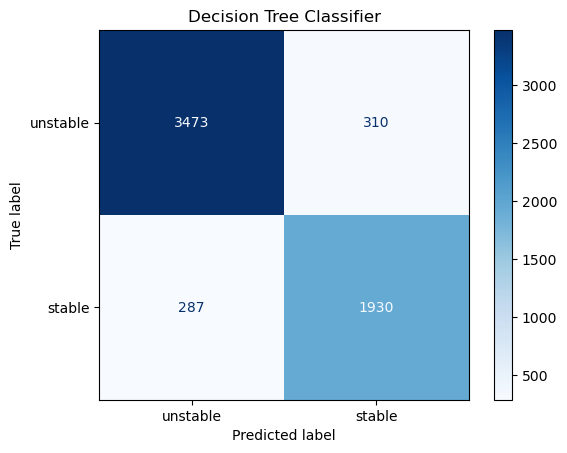

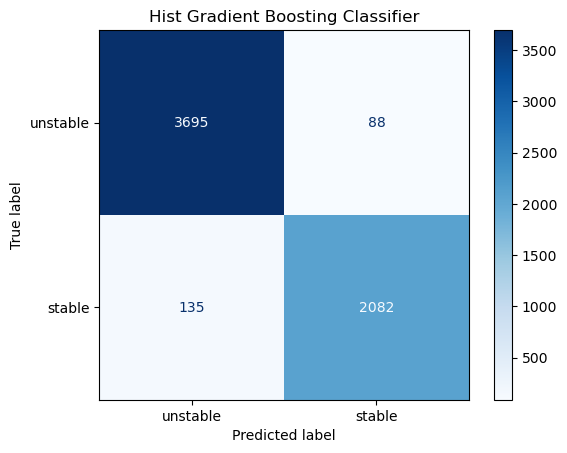

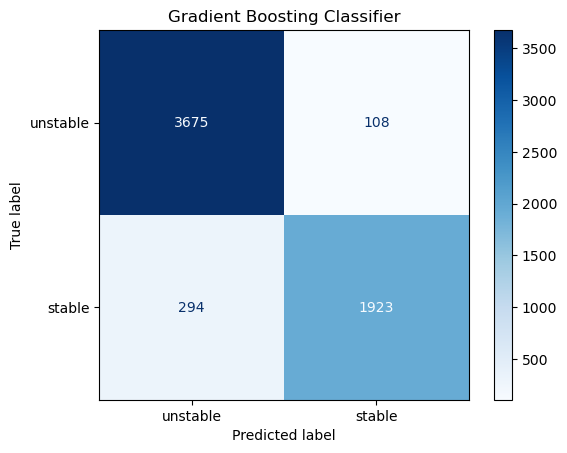

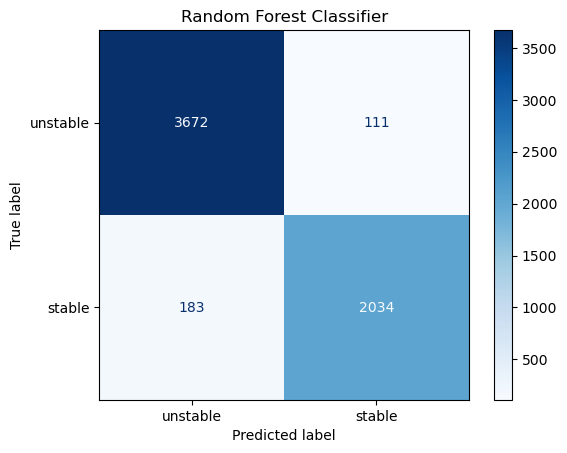

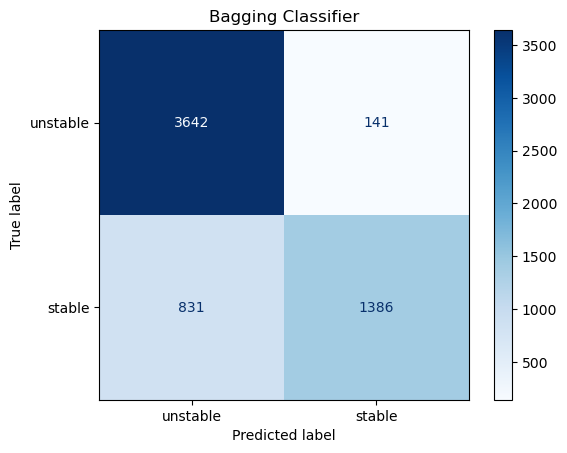

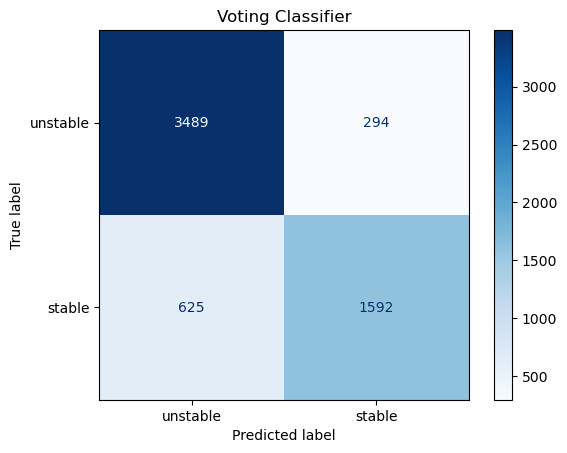

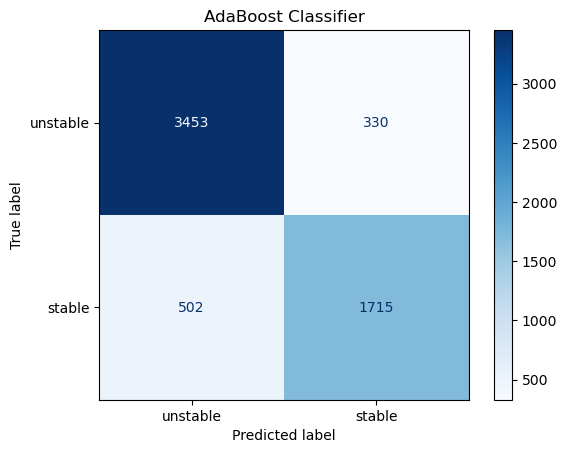

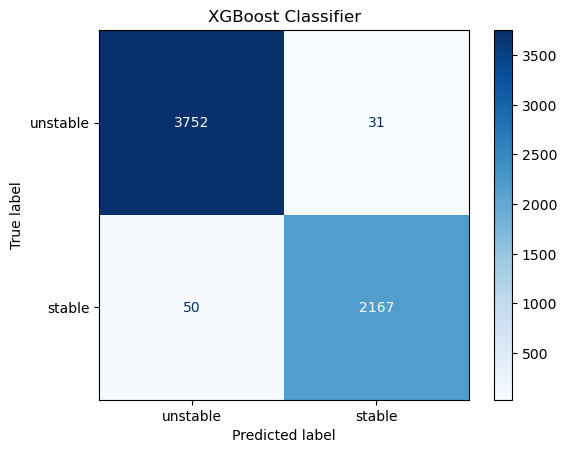

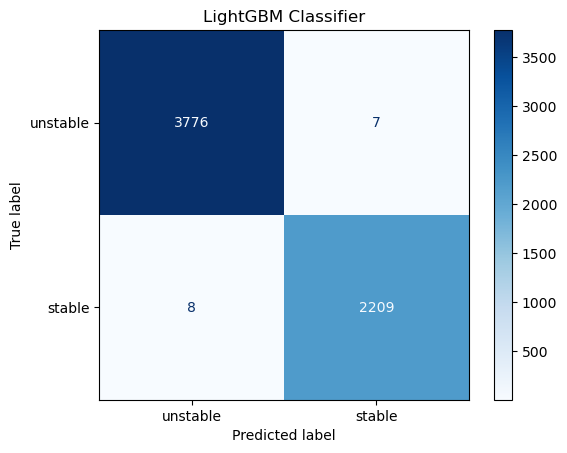

In [181]:
plt.figure()
plt.tight_layout()
for n, cm in enumerate(cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['unstable', 'stable'])
    disp.plot(cmap='Blues')
    plt.title(list(models.keys())[n])

<Axes: >

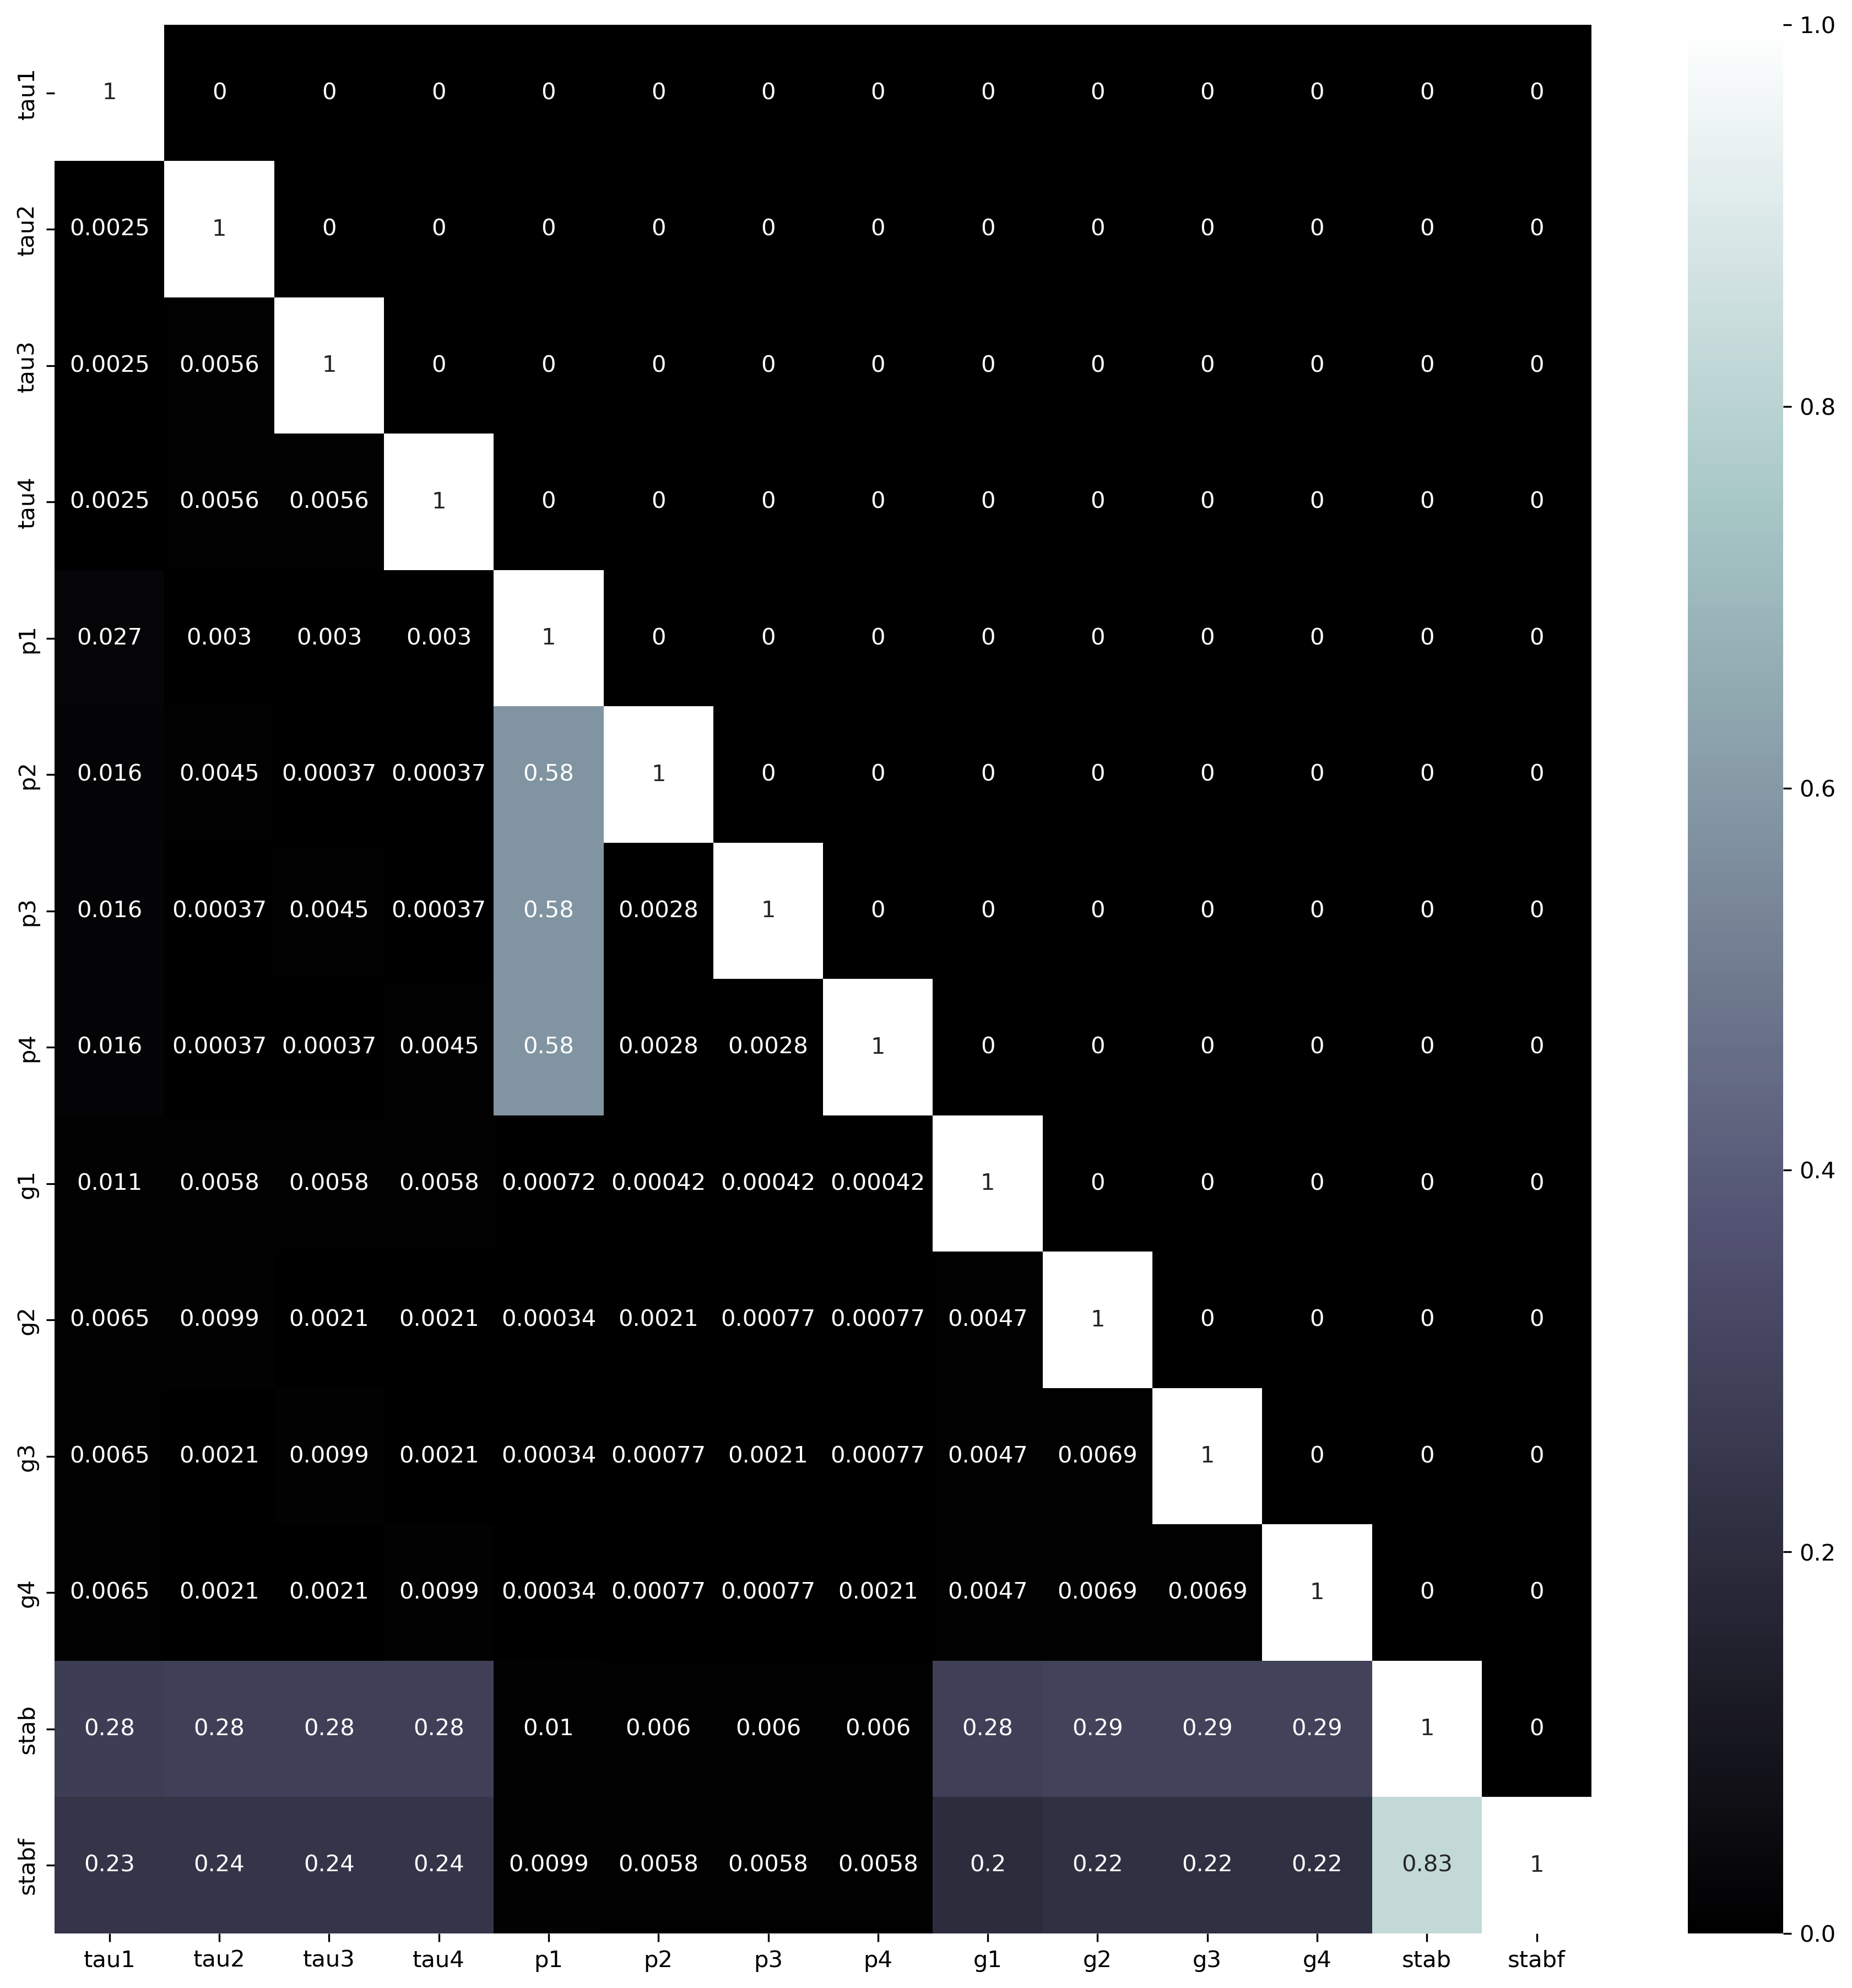

In [182]:
plt.figure(figsize=(15,15), dpi=300)
sns.heatmap(np.tril(np.abs(new_csv.corr())), annot=True, xticklabels=data_csv.columns, yticklabels=data_csv.columns, cmap=plt.cm.bone)

In [183]:
preprocessor = preprocessing.StandardScaler()
trained_models, cms, scores = train_models(models, x_data.drop(['p1', 'p2', 'p3', 'p4'], axis=1), y_data, train_size=0.9, save=False, preprocessor=preprocessor)
model_scores_dict['Correlation Based'] = [f'{s*100:.2f}%' for s in scores[0]]
correlation_training_table = make_scores_table(scores)
correlation_training_table.to_csv('correlation training.csv')

using model: Logistic Regression
Accuracy: 0.8132 ; MAE: 0.1868 ; Precision: 0.7657 ; Recall: 0.6969 ; F1: 0.7297 	 finished in 0.0565 second(s)

using model: Ridge Classifier
Accuracy: 0.8140 ; MAE: 0.1860 ; Precision: 0.7693 ; Recall: 0.6942 ; F1: 0.7298 	 finished in 0.0568 second(s)

using model: SGD classifier
Accuracy: 0.8122 ; MAE: 0.1878 ; Precision: 0.7610 ; Recall: 0.7011 ; F1: 0.7298 	 finished in 0.1084 second(s)

using model: Passive Aggressive Classifier
Accuracy: 0.7767 ; MAE: 0.2233 ; Precision: 0.7036 ; Recall: 0.6614 ; F1: 0.6819 	 finished in 0.0532 second(s)

using model: Linear Discriminant Analysis
Accuracy: 0.8137 ; MAE: 0.1863 ; Precision: 0.7647 ; Recall: 0.7006 ; F1: 0.7312 	 finished in 0.0675 second(s)

using model: Quadratic Discriminant Analysis
Accuracy: 0.8762 ; MAE: 0.1238 ; Precision: 0.8531 ; Recall: 0.7946 ; F1: 0.8228 	 finished in 0.0539 second(s)

using model: Suport Vector Classifier
Accuracy: 0.9865 ; MAE: 0.0135 ; Precision: 0.9838 ; Recall: 0.

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8133 ; MAE: 0.1867 ; Precision: 0.7658 ; Recall: 0.6974 ; F1: 0.7300 	 finished in 1.0398 second(s)

using model: KNeighbors Classifier
Accuracy: 0.9383 ; MAE: 0.0617 ; Precision: 0.9395 ; Recall: 0.8867 ; F1: 0.9123 	 finished in 1.1175 second(s)

using model: Gaussian Naive Bayes
Accuracy: 0.8378 ; MAE: 0.1622 ; Precision: 0.8462 ; Recall: 0.6743 ; F1: 0.7506 	 finished in 0.0439 second(s)

using model: Decision Tree Classifier
Accuracy: 0.9007 ; MAE: 0.0993 ; Precision: 0.8637 ; Recall: 0.8614 ; F1: 0.8625 	 finished in 0.6122 second(s)

using model: Hist Gradient Boosting Classifier
Accuracy: 0.9635 ; MAE: 0.0365 ; Precision: 0.9591 ; Recall: 0.9392 ; F1: 0.9490 	 finished in 0.7405 second(s)

using model: Gradient Boosting Classifier
Accuracy: 0.9323 ; MAE: 0.0677 ; Precision: 0.9432 ; Recall: 0.8650 ; F1: 0.9025 	 finished in 16.9894 second(s)

using model: Random Forest Classifier
Accuracy: 0.9585 ; MAE: 0.0415 ; Precision: 0.9594 ; Recall: 0.9245 ; F1: 0.9416 	 fini

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8642 ; MAE: 0.1358 ; Precision: 0.8370 ; Recall: 0.7757 ; F1: 0.8052 	 finished in 13.9871 second(s)

using model: XGBoost Classifier
Accuracy: 0.9855 ; MAE: 0.0145 ; Precision: 0.9820 ; Recall: 0.9779 ; F1: 0.9799 	 finished in 1.8229 second(s)

using model: LightGBM Classifier
[LightGBM] [Info] Number of positive: 19549, number of negative: 34451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362019 -> initscore=-0.566614
[LightGBM] [Info] Start training from score -0.566614
Accuracy: 0.9942 ; MAE: 0.0058 ; Precision: 0.9904 ; Recall: 0.9936 ; F1: 0.9920 	 finished in 1.6014 second(s)



In [184]:
correlation_training_table

Accuracy       MAE  Precision    Recall  \
Logistic Regression                0.813167  0.186833   0.765688  0.696914   
Ridge Classifier                   0.814000  0.186000   0.769270  0.694150   
SGD classifier                     0.812167  0.187833   0.761000  0.701059   
Passive Aggressive Classifier      0.776667  0.223333   0.703577  0.661446   
Linear Discriminant Analysis       0.813667  0.186333   0.764706  0.700599   
Quadratic Discriminant Analysis    0.876167  0.123833   0.853116  0.794565   
Suport Vector Classifier           0.986500  0.013500   0.983796  0.978812   
Linear Support Vector Classifier   0.813333  0.186667   0.765807  0.697374   
KNeighbors Classifier              0.938333  0.061667   0.939483  0.886688   
Gaussian Naive Bayes               0.837833  0.162167   0.846243  0.674344   
Decision Tree Classifier           0.900667  0.099333   0.863741  0.861354   
Hist Gradient Boosting Classifier  0.963500  0.036500   0.959078  0.939199   
Gradient Boosting Classifier       0.932333  0.067667   0.943245  0.865039   
Random Forest Classifier           0.958500  0.041500   0.959369  0.924459   
Bagging Classifier                 0.818833  0.181167   0.857049  0.599263   
Voting Classifier                  0.847667  0.152333   0.846663  0.707047   
AdaBoost Classifier                0.864167  0.135833   0.836978  0.775679   
XGBoost Classifier                 0.985500  0.014500   0.981961  0.977890   
LightGBM Classifier                0.994167  0.005833   0.990358  0.993551   

                                         F1  
Logistic Regression                0.729684  
Ridge Classifier                   0.729782  
SGD classifier                     0.729801  
Passive Aggressive Classifier      0.681861  
Linear Discriminant Analysis       0.731250  
Quadratic Discriminant Analysis    0.822800  
Suport Vector Classifier           0.981298  
Linear Support Vector Classifier   0.729990  
KNeighbors Classifier              0.912322  
Gaussian Naive Bayes               0.750577  
Decision Tree Classifier           0.862546  
Hist Gradient Boosting Classifier  0.949034  
Gradient Boosting Classifier       0.902451  
Random Forest Classifier           0.941590  
Bagging Classifier                 0.705340  
Voting Classifier                  0.770582  
AdaBoost Classifier                0.805164  
XGBoost Classifier                 0.979922  
LightGBM Classifier                0.991952

In [185]:
kmeans = KMeans(n_clusters=2, n_init="auto").fit(standard_x)

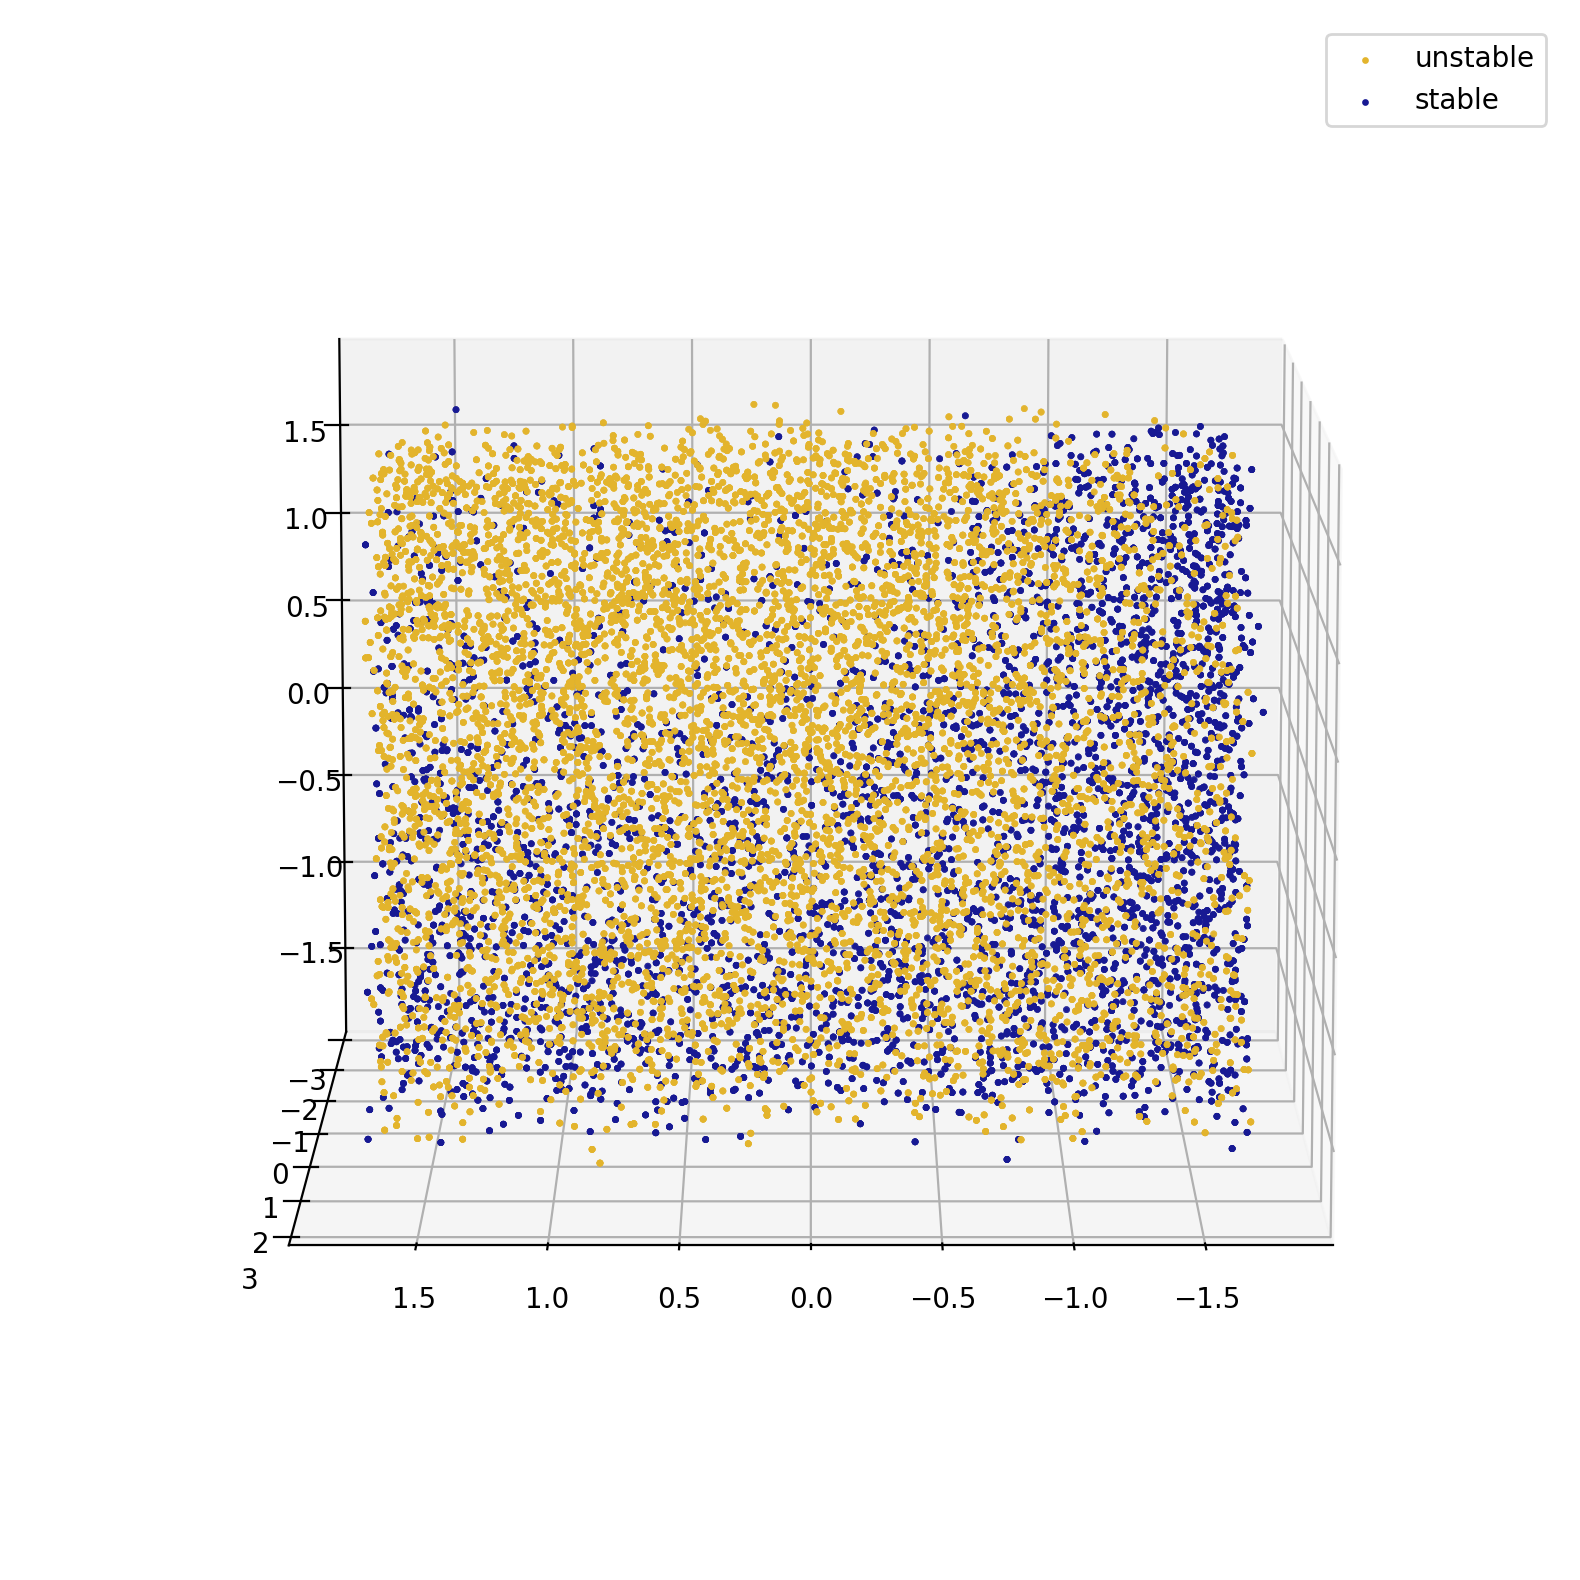

In [186]:
fig = plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(projection='3d')
ax.scatter3D(standard_x.loc[y_data==0]['tau1'], standard_x.loc[y_data==0]['p1'], standard_x.loc[y_data==0]['g1'], s=2, c='#E3B42C', label='unstable')
ax.scatter3D(standard_x.loc[y_data==1]['tau1'], standard_x.loc[y_data==1]['p1'], standard_x.loc[y_data==1]['g1'], s=2, c='#171993', label='stable')
ax.legend()
ax.view_init(10, 90)

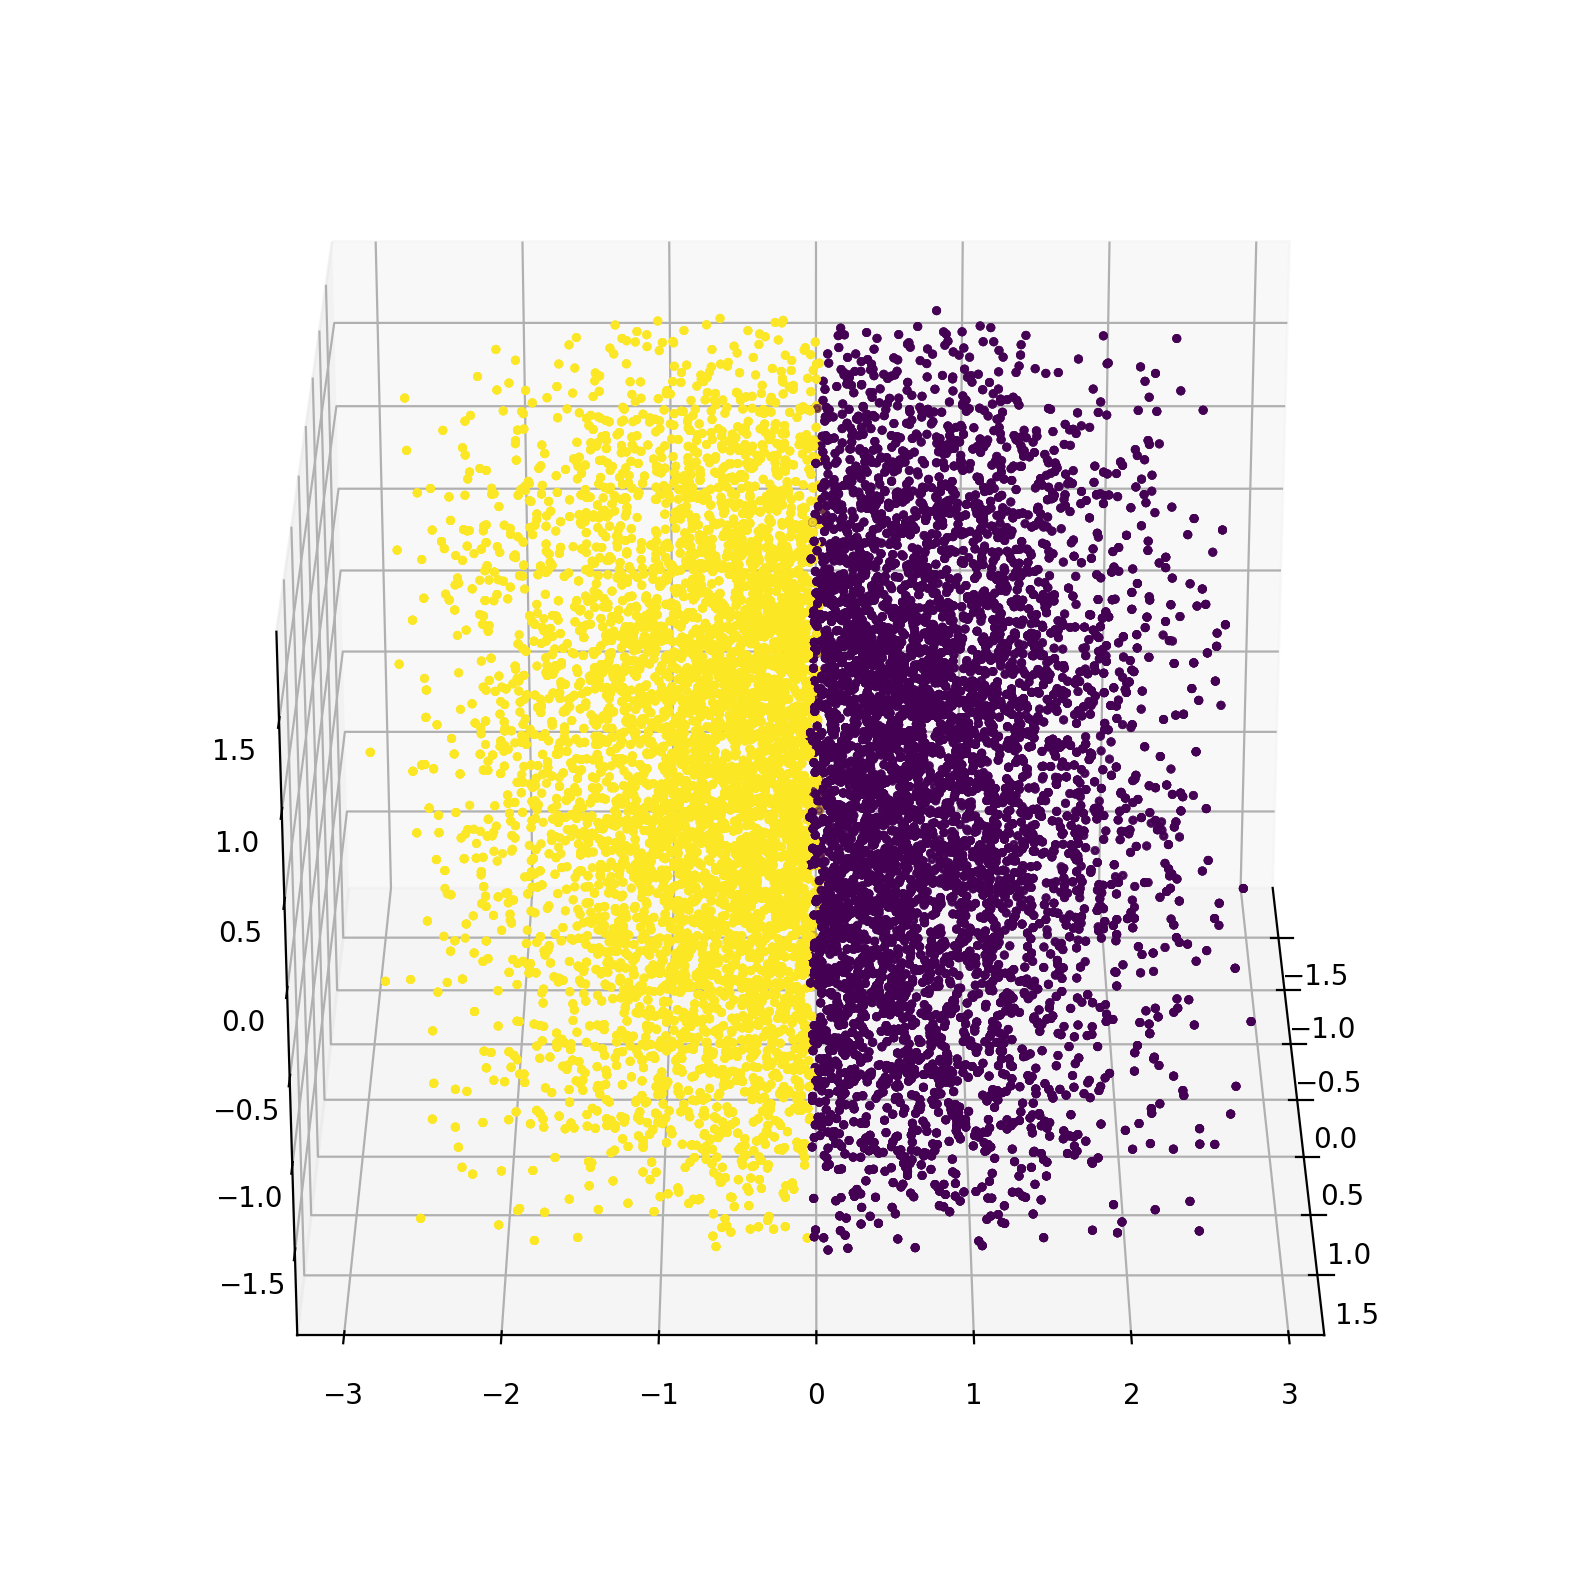

In [187]:
fig = plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(projection='3d')
ax.scatter3D(standard_x['tau1'], standard_x['p1'], standard_x['g1'], s=5, c=kmeans.labels_)
ax.view_init(25, 0)

In [188]:
preprocessor = preprocessing.StandardScaler()
trained_models, cms, scores = train_models(models, x_data.join(pd.Series(kmeans.labels_, name='Clusters')),
                                                 y_data, train_size=0.9, save=False, preprocessor=preprocessor)
model_scores_dict['Kmeans Clustering Based'] = [f'{s*100:.2f}%' for s in scores[0]]
kmeans_training_table = make_scores_table(scores)
kmeans_training_table.to_csv('kmeans training.csv')

using model: Logistic Regression
Accuracy: 0.8172 ; MAE: 0.1828 ; Precision: 0.7777 ; Recall: 0.7040 ; F1: 0.7390 	 finished in 0.0635 second(s)

using model: Ridge Classifier
Accuracy: 0.8177 ; MAE: 0.1823 ; Precision: 0.7805 ; Recall: 0.7013 ; F1: 0.7388 	 finished in 0.0460 second(s)

using model: SGD classifier
Accuracy: 0.8175 ; MAE: 0.1825 ; Precision: 0.7730 ; Recall: 0.7131 ; F1: 0.7418 	 finished in 0.1262 second(s)

using model: Passive Aggressive Classifier
Accuracy: 0.7620 ; MAE: 0.2380 ; Precision: 0.7852 ; Recall: 0.4855 ; F1: 0.6000 	 finished in 0.0633 second(s)

using model: Linear Discriminant Analysis
Accuracy: 0.8170 ; MAE: 0.1830 ; Precision: 0.7756 ; Recall: 0.7067 ; F1: 0.7396 	 finished in 0.1068 second(s)

using model: Quadratic Discriminant Analysis


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.8750 ; MAE: 0.1250 ; Precision: 0.8593 ; Recall: 0.7892 ; F1: 0.8228 	 finished in 0.0774 second(s)

using model: Suport Vector Classifier
Accuracy: 0.9795 ; MAE: 0.0205 ; Precision: 0.9815 ; Recall: 0.9624 ; F1: 0.9718 	 finished in 24.9562 second(s)

using model: Linear Support Vector Classifier


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8172 ; MAE: 0.1828 ; Precision: 0.7777 ; Recall: 0.7040 ; F1: 0.7390 	 finished in 1.9661 second(s)

using model: KNeighbors Classifier
Accuracy: 0.9022 ; MAE: 0.0978 ; Precision: 0.9313 ; Recall: 0.7924 ; F1: 0.8562 	 finished in 4.2675 second(s)

using model: Gaussian Naive Bayes
Accuracy: 0.8393 ; MAE: 0.1607 ; Precision: 0.8532 ; Recall: 0.6800 ; F1: 0.7568 	 finished in 0.0518 second(s)

using model: Decision Tree Classifier
Accuracy: 0.9018 ; MAE: 0.0982 ; Precision: 0.8687 ; Recall: 0.8636 ; F1: 0.8661 	 finished in 1.0198 second(s)

using model: Hist Gradient Boosting Classifier
Accuracy: 0.9655 ; MAE: 0.0345 ; Precision: 0.9673 ; Recall: 0.9379 ; F1: 0.9524 	 finished in 0.7638 second(s)

using model: Gradient Boosting Classifier
Accuracy: 0.9325 ; MAE: 0.0675 ; Precision: 0.9487 ; Recall: 0.8631 ; F1: 0.9039 	 finished in 25.1332 second(s)

using model: Random Forest Classifier
Accuracy: 0.9525 ; MAE: 0.0475 ; Precision: 0.9554 ; Recall: 0.9134 ; F1: 0.9340 	 fini

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8645 ; MAE: 0.1355 ; Precision: 0.8373 ; Recall: 0.7838 ; F1: 0.8096 	 finished in 18.9886 second(s)

using model: XGBoost Classifier
Accuracy: 0.9860 ; MAE: 0.0140 ; Precision: 0.9898 ; Recall: 0.9719 ; F1: 0.9808 	 finished in 2.0824 second(s)

using model: LightGBM Classifier
[LightGBM] [Info] Number of positive: 19514, number of negative: 34486
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3063
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361370 -> initscore=-0.569421
[LightGBM] [Info] Start training from score -0.569421
Accuracy: 0.9958 ; MAE: 0.0042 ; Precision: 0.9973 ; Recall: 0.9914 ; F1: 0.9943 	 finished in 1.5331 second(s)



In [189]:
kmeans_training_table

Accuracy       MAE  Precision    Recall  \
Logistic Regression                0.817167  0.182833   0.777666  0.703989   
Ridge Classifier                   0.817667  0.182333   0.780525  0.701269   
SGD classifier                     0.817500  0.182500   0.772973  0.713055   
Passive Aggressive Classifier      0.762000  0.238000   0.785191  0.485494   
Linear Discriminant Analysis       0.817000  0.183000   0.775622  0.706709   
Quadratic Discriminant Analysis    0.875000  0.125000   0.859329  0.789211   
Suport Vector Classifier           0.979500  0.020500   0.981507  0.962375   
Linear Support Vector Classifier   0.817167  0.182833   0.777666  0.703989   
KNeighbors Classifier              0.902167  0.097833   0.931273  0.792384   
Gaussian Naive Bayes               0.839333  0.160667   0.853242  0.679964   
Decision Tree Classifier           0.901833  0.098167   0.868673  0.863554   
Hist Gradient Boosting Classifier  0.965500  0.034500   0.967274  0.937897   
Gradient Boosting Classifier       0.932500  0.067500   0.948680  0.863101   
Random Forest Classifier           0.952500  0.047500   0.955429  0.913418   
Bagging Classifier                 0.852833  0.147167   0.918936  0.657752   
Voting Classifier                  0.850833  0.149167   0.855285  0.715322   
AdaBoost Classifier                0.864500  0.135500   0.837288  0.783772   
XGBoost Classifier                 0.986000  0.014000   0.989843  0.971895   
LightGBM Classifier                0.995833  0.004167   0.997264  0.991387   

                                         F1  
Logistic Regression                0.738996  
Ridge Classifier                   0.738777  
SGD classifier                     0.741806  
Passive Aggressive Classifier      0.600000  
Linear Discriminant Analysis       0.739564  
Quadratic Discriminant Analysis    0.822779  
Suport Vector Classifier           0.971847  
Linear Support Vector Classifier   0.738996  
KNeighbors Classifier              0.856233  
Gaussian Naive Bayes               0.756811  
Decision Tree Classifier           0.866106  
Hist Gradient Boosting Classifier  0.952359  
Gradient Boosting Classifier       0.903869  
Random Forest Classifier           0.933951  
Bagging Classifier                 0.766711  
Voting Classifier                  0.779067  
AdaBoost Classifier                0.809646  
XGBoost Classifier                 0.980787  
LightGBM Classifier                0.994317

In [190]:
mi_scores = make_mi_scores(x_data, y_data)
mi_scores

tau1    0.656498
p1      0.655519
g1      0.655312
tau4    0.256579
tau3    0.256578
tau2    0.256577
g2      0.248290
g3      0.248290
g4      0.248290
p2      0.236279
p3      0.236279
p4      0.236279
Name: MI Scores, dtype: float64

In [191]:
best_mi_cols = list(mi_scores.index[:3])
x_data[best_mi_cols]

tau1        p1        g1
0      2.959060  3.763085  0.650456
1      9.304097  5.067812  0.413441
2      8.971707  3.405158  0.163041
3      0.716415  3.963791  0.446209
4      3.134112  3.525811  0.797110
...         ...       ...       ...
59995  2.930406  3.343416  0.601709
59996  3.392299  4.349512  0.502079
59997  2.364034  4.299976  0.487838
59998  9.631511  2.514755  0.365246
59999  6.530527  3.492807  0.073056

[60000 rows x 3 columns]

In [192]:
preprocessor = preprocessing.StandardScaler()
trained_models, cms, scores = train_models(models, x_data[best_mi_cols], y_data, train_size=0.9, save=False, preprocessor=preprocessor)
model_scores_dict['Mutual Information Regression Based'] = [f'{s*100:.2f}%' for s in scores[0]]
MI_training_table = make_scores_table(scores)
MI_training_table.to_csv('MI training.csv')

using model: Logistic Regression
Accuracy: 0.6525 ; MAE: 0.3475 ; Precision: 0.5672 ; Recall: 0.2816 ; F1: 0.3763 	 finished in 0.0320 second(s)

using model: Ridge Classifier
Accuracy: 0.6530 ; MAE: 0.3470 ; Precision: 0.5712 ; Recall: 0.2731 ; F1: 0.3695 	 finished in 0.0322 second(s)

using model: SGD classifier
Accuracy: 0.6277 ; MAE: 0.3723 ; Precision: 0.0000 ; Recall: 0.0000 ; F1: 0.0000 	 finished in 0.0885 second(s)

using model: Passive Aggressive Classifier


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5910 ; MAE: 0.4090 ; Precision: 0.4504 ; Recall: 0.4472 ; F1: 0.4488 	 finished in 0.0617 second(s)

using model: Linear Discriminant Analysis
Accuracy: 0.6508 ; MAE: 0.3492 ; Precision: 0.5615 ; Recall: 0.2842 ; F1: 0.3774 	 finished in 0.0914 second(s)

using model: Quadratic Discriminant Analysis
Accuracy: 0.6802 ; MAE: 0.3198 ; Precision: 0.6200 ; Recall: 0.3644 ; F1: 0.4590 	 finished in 0.0420 second(s)

using model: Suport Vector Classifier
Accuracy: 0.6827 ; MAE: 0.3173 ; Precision: 0.6447 ; Recall: 0.3290 ; F1: 0.4357 	 finished in 105.9439 second(s)

using model: Linear Support Vector Classifier


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.6530 ; MAE: 0.3470 ; Precision: 0.5712 ; Recall: 0.2731 ; F1: 0.3695 	 finished in 0.4648 second(s)

using model: KNeighbors Classifier
Accuracy: 0.6923 ; MAE: 0.3077 ; Precision: 0.5958 ; Recall: 0.5398 ; F1: 0.5665 	 finished in 0.3369 second(s)

using model: Gaussian Naive Bayes
Accuracy: 0.6578 ; MAE: 0.3422 ; Precision: 0.5856 ; Recall: 0.2771 ; F1: 0.3762 	 finished in 0.0165 second(s)

using model: Decision Tree Classifier
Accuracy: 1.0000 ; MAE: 0.0000 ; Precision: 1.0000 ; Recall: 1.0000 ; F1: 1.0000 	 finished in 0.1534 second(s)

using model: Hist Gradient Boosting Classifier
Accuracy: 0.7528 ; MAE: 0.2472 ; Precision: 0.7560 ; Recall: 0.4964 ; F1: 0.5993 	 finished in 0.7267 second(s)

using model: Gradient Boosting Classifier
Accuracy: 0.7020 ; MAE: 0.2980 ; Precision: 0.6582 ; Recall: 0.4154 ; F1: 0.5093 	 finished in 4.0415 second(s)

using model: Random Forest Classifier
Accuracy: 1.0000 ; MAE: 0.0000 ; Precision: 1.0000 ; Recall: 1.0000 ; F1: 1.0000 	 finis

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6840 ; MAE: 0.3160 ; Precision: 0.6449 ; Recall: 0.3366 ; F1: 0.4424 	 finished in 5.1376 second(s)

using model: XGBoost Classifier
Accuracy: 1.0000 ; MAE: 0.0000 ; Precision: 1.0000 ; Recall: 1.0000 ; F1: 1.0000 	 finished in 2.7327 second(s)

using model: LightGBM Classifier
[LightGBM] [Info] Number of positive: 19486, number of negative: 34514
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360852 -> initscore=-0.571669
[LightGBM] [Info] Start training from score -0.571669
Accuracy: 0.9673 ; MAE: 0.0327 ; Precision: 0.9923 ; Recall: 0.9194 ; F1: 0.9545 	 finished in 1.0109 second(s)



In [193]:
MI_training_table

Accuracy       MAE  Precision    Recall  \
Logistic Regression                0.652500  0.347500   0.567178  0.281558   
Ridge Classifier                   0.653000  0.347000   0.571161  0.273053   
SGD classifier                     0.627667  0.372333   0.000000  0.000000   
Passive Aggressive Classifier      0.591000  0.409000   0.450406  0.447180   
Linear Discriminant Analysis       0.650833  0.349167   0.561450  0.284244   
Quadratic Discriminant Analysis    0.680167  0.319833   0.619954  0.364369   
Suport Vector Classifier           0.682667  0.317333   0.644737  0.329006   
Linear Support Vector Classifier   0.653000  0.347000   0.571161  0.273053   
KNeighbors Classifier              0.692333  0.307667   0.595850  0.539839   
Gaussian Naive Bayes               0.657833  0.342167   0.585620  0.277081   
Decision Tree Classifier           1.000000  0.000000   1.000000  1.000000   
Hist Gradient Boosting Classifier  0.752833  0.247167   0.755965  0.496419   
Gradient Boosting Classifier       0.702000  0.298000   0.658156  0.415398   
Random Forest Classifier           1.000000  0.000000   1.000000  1.000000   
Bagging Classifier                 0.928833  0.071167   0.965482  0.838854   
Voting Classifier                  0.673167  0.326833   0.623753  0.307968   
AdaBoost Classifier                0.684000  0.316000   0.644940  0.336616   
XGBoost Classifier                 1.000000  0.000000   1.000000  1.000000   
LightGBM Classifier                0.967333  0.032667   0.992271  0.919427   

                                         F1  
Logistic Regression                0.376309  
Ridge Classifier                   0.369473  
SGD classifier                     0.000000  
Passive Aggressive Classifier      0.448787  
Linear Discriminant Analysis       0.377415  
Quadratic Discriminant Analysis    0.458979  
Suport Vector Classifier           0.435685  
Linear Support Vector Classifier   0.369473  
KNeighbors Classifier              0.566463  
Gaussian Naive Bayes               0.376177  
Decision Tree Classifier           1.000000  
Hist Gradient Boosting Classifier  0.599297  
Gradient Boosting Classifier       0.509330  
Random Forest Classifier           1.000000  
Bagging Classifier                 0.897725  
Voting Classifier                  0.412346  
AdaBoost Classifier                0.442353  
XGBoost Classifier                 1.000000  
LightGBM Classifier                0.954461

In [198]:
pca = PCA(n_components=3)

x_pca = pca.fit_transform(standard_x)
pca_index = [f'PC{i+1}' for i in range(x_pca.shape[1])]
x_pca = pd.DataFrame(x_pca, columns=pca_index)

x_pca

PC1       PC2       PC3
0     -0.004904  1.138208 -1.624617
1     -2.527426 -1.248905 -0.705855
2      0.602400 -0.221604 -0.134095
3     -0.338799  0.650442  0.313589
4      0.438793  0.904773 -1.073020
...         ...       ...       ...
59995  0.791641  0.627182 -0.650330
59996 -1.093968 -0.514009  1.310824
59997 -0.988838 -0.098475  1.310948
59998  2.263664 -0.372624 -1.443275
59999  0.461422  1.377818 -0.302466

[60000 rows x 3 columns]

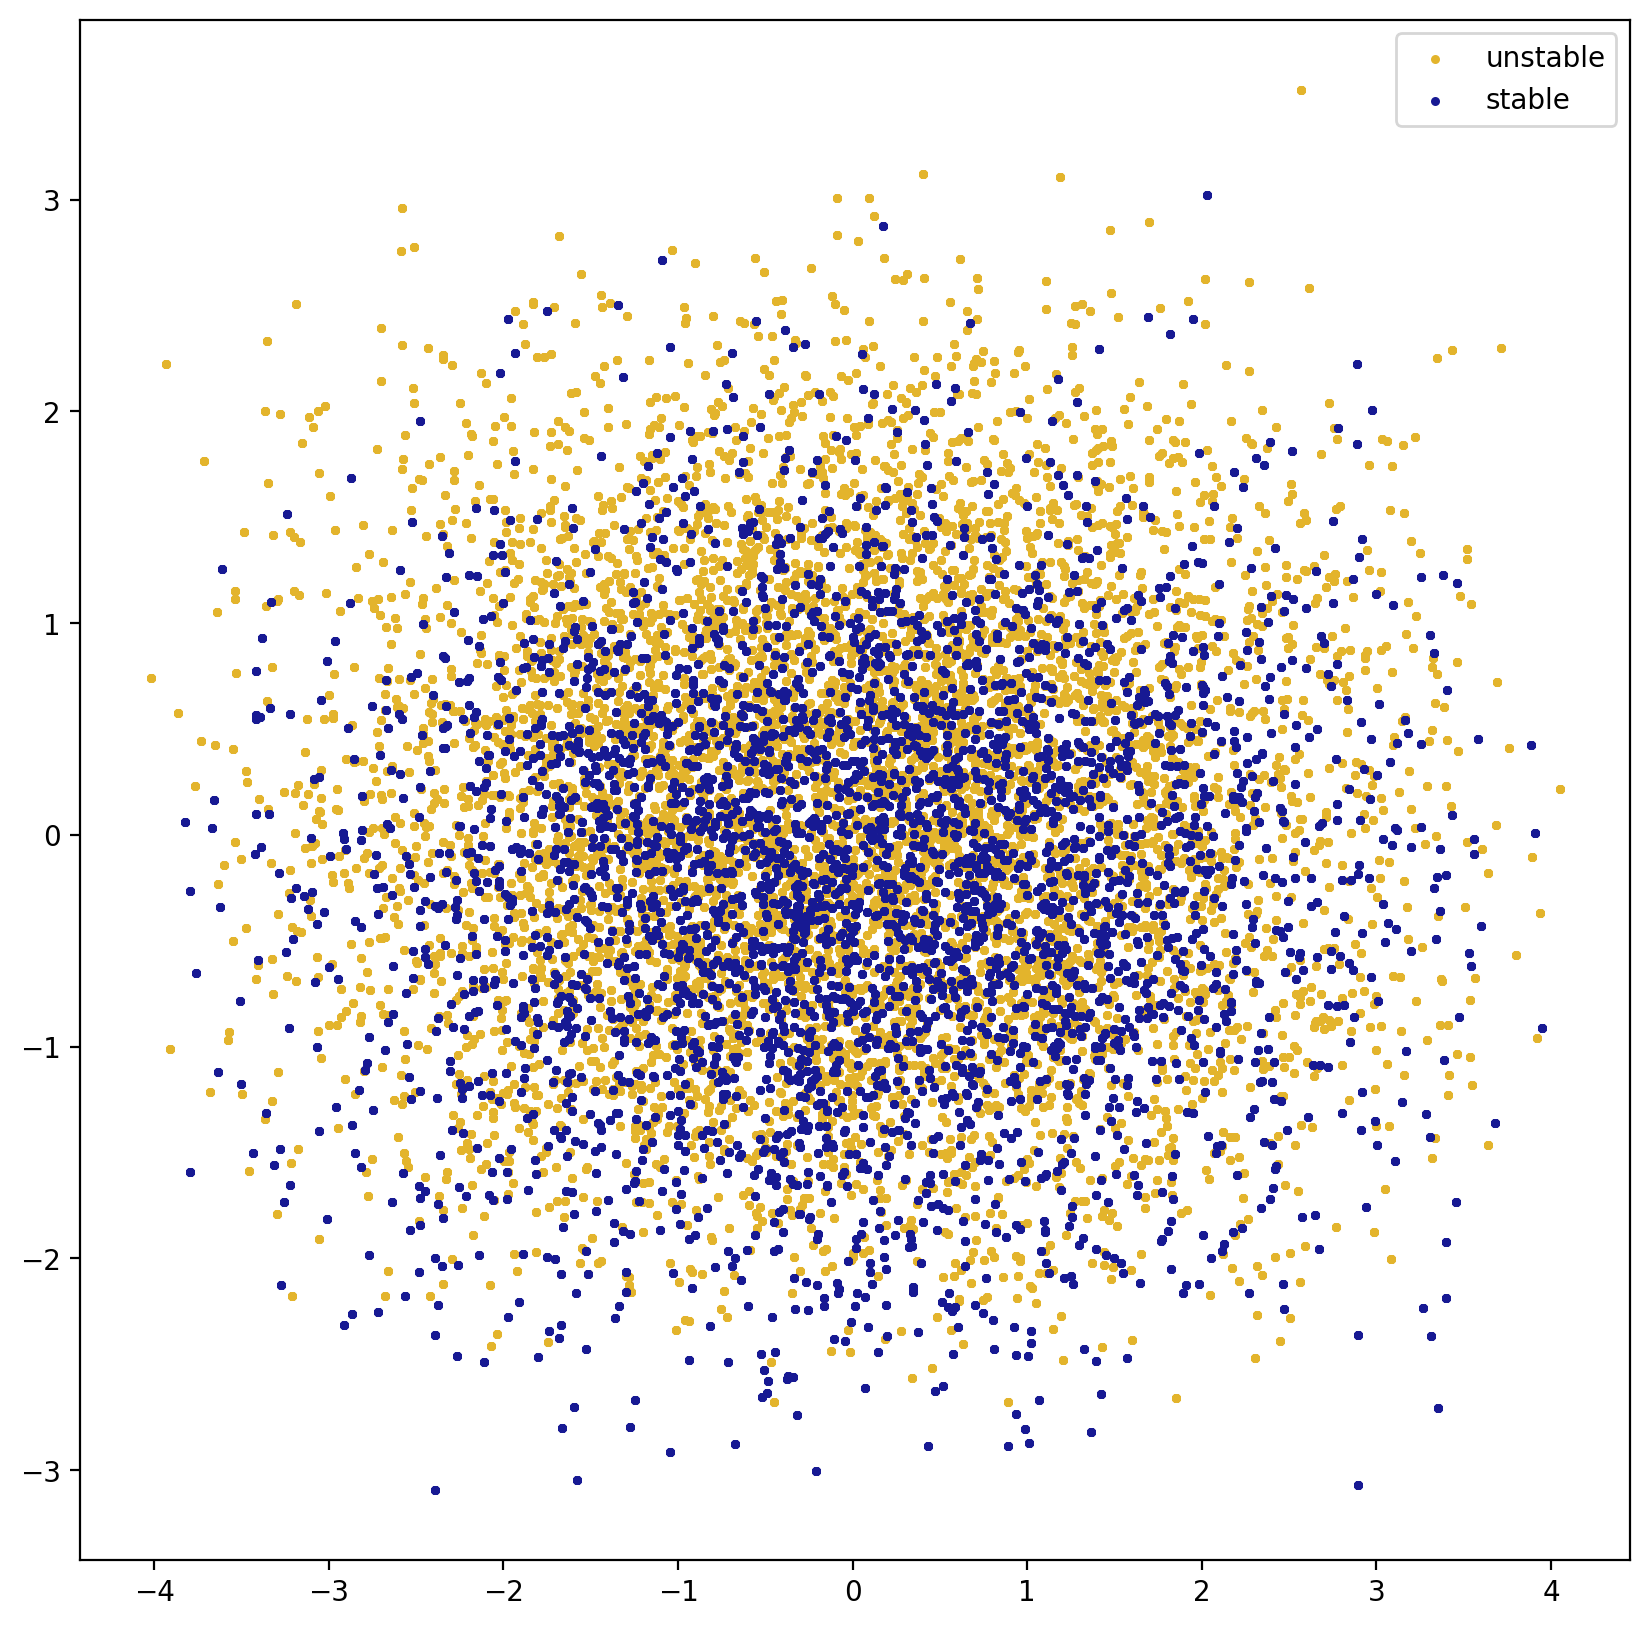

In [199]:
fig = plt.figure(figsize=(10, 10), dpi=200)
plt.scatter(x_pca.loc[y_data==0]['PC1'], x_pca.loc[y_data==0]['PC2'], s=5, c='#E3B42C', label='unstable')
plt.scatter(x_pca.loc[y_data==1]['PC1'], x_pca.loc[y_data==1]['PC2'], s=5, c='#171993', label='stable')
plt.legend()

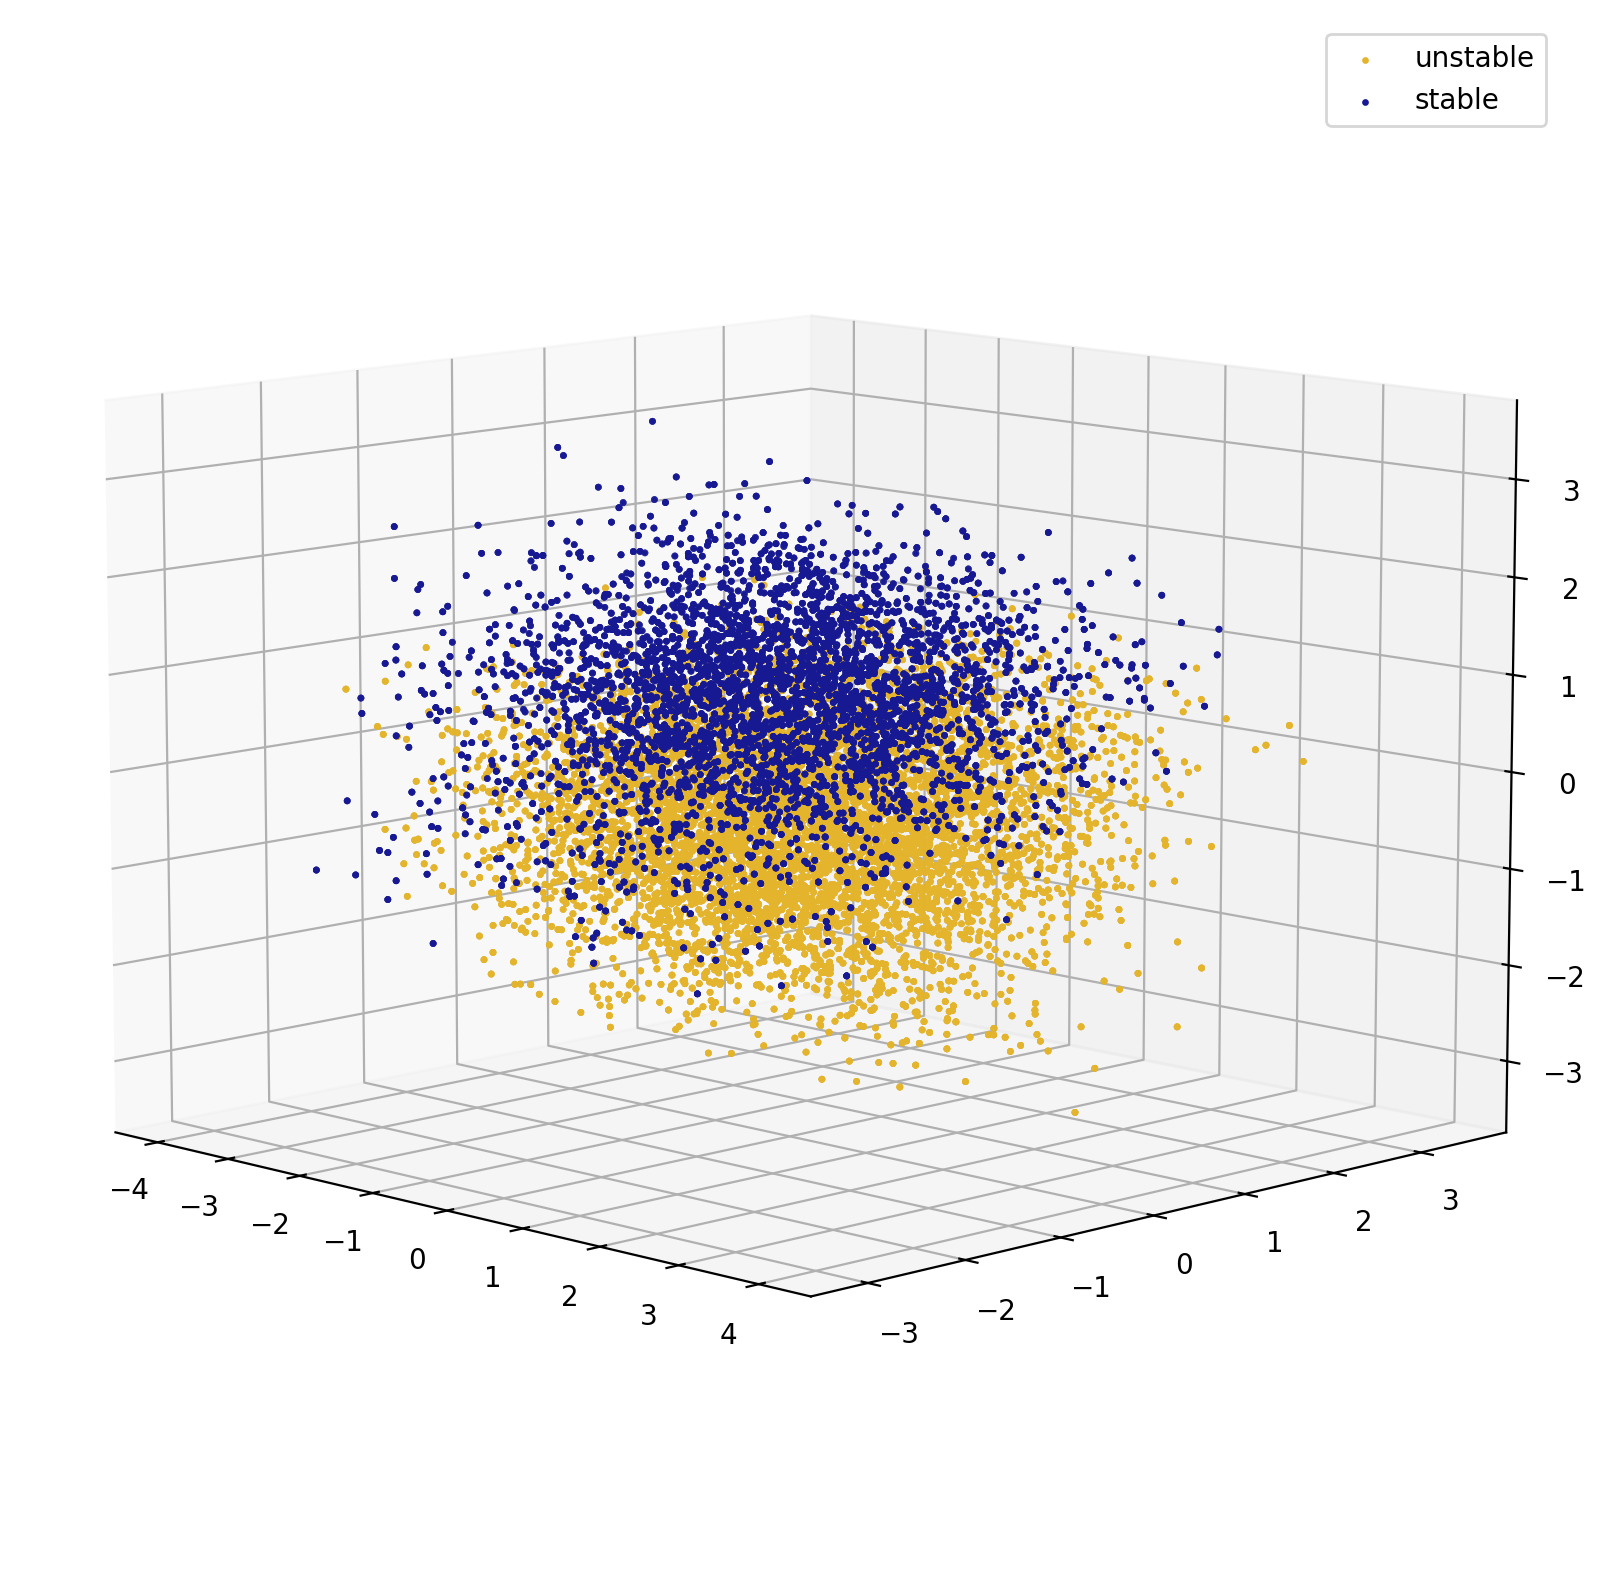

In [200]:
fig = plt.figure(figsize=(10, 10), dpi=200)
ax = plt.subplot(projection='3d')
ax.scatter3D(x_pca.loc[y_data==0]['PC1'], x_pca.loc[y_data==0]['PC2'], x_pca.loc[y_data==0]['PC3'], s=2, c='#E3B42C', label='unstable')
ax.scatter3D(x_pca.loc[y_data==1]['PC1'], x_pca.loc[y_data==1]['PC2'], x_pca.loc[y_data==1]['PC3'], s=2, c='#171993', label='stable')
ax.legend()
ax.view_init(10, -45)

In [201]:
preprocessor = preprocessing.StandardScaler()
trained_models, cms, scores = train_models(models, x_pca, y_data, train_size=0.9, save=True, preprocessor=preprocessor)
model_scores_dict['PCA based'] = [f'{s*100:.2f}%' for s in scores[0]]
PCA_training_table = make_scores_table(scores)
PCA_training_table.to_csv('PCA training.csv')

using model: Logistic Regression
Accuracy: 0.8127 ; MAE: 0.1873 ; Precision: 0.7683 ; Recall: 0.6975 ; F1: 0.7312 	 finished in 0.0819 second(s)

using model: Ridge Classifier
Accuracy: 0.8128 ; MAE: 0.1872 ; Precision: 0.7709 ; Recall: 0.6939 ; F1: 0.7304 	 finished in 0.0613 second(s)

using model: SGD classifier
Accuracy: 0.8085 ; MAE: 0.1915 ; Precision: 0.7651 ; Recall: 0.6866 ; F1: 0.7237 	 finished in 0.0695 second(s)

using model: Passive Aggressive Classifier
Accuracy: 0.6068 ; MAE: 0.3932 ; Precision: 0.4809 ; Recall: 0.9589 ; F1: 0.6406 	 finished in 0.0783 second(s)

using model: Linear Discriminant Analysis
Accuracy: 0.8115 ; MAE: 0.1885 ; Precision: 0.7654 ; Recall: 0.6980 ; F1: 0.7301 	 finished in 0.0551 second(s)

using model: Quadratic Discriminant Analysis
Accuracy: 0.8120 ; MAE: 0.1880 ; Precision: 0.7623 ; Recall: 0.7053 ; F1: 0.7327 	 finished in 0.0350 second(s)

using model: Suport Vector Classifier
Accuracy: 0.8128 ; MAE: 0.1872 ; Precision: 0.7945 ; Recall: 0.

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8127 ; MAE: 0.1873 ; Precision: 0.7683 ; Recall: 0.6975 ; F1: 0.7312 	 finished in 0.4534 second(s)

using model: KNeighbors Classifier
Accuracy: 0.8007 ; MAE: 0.1993 ; Precision: 0.7351 ; Recall: 0.7103 ; F1: 0.7225 	 finished in 0.4171 second(s)

using model: Gaussian Naive Bayes
Accuracy: 0.8117 ; MAE: 0.1883 ; Precision: 0.7712 ; Recall: 0.6889 ; F1: 0.7277 	 finished in 0.0316 second(s)

using model: Decision Tree Classifier
Accuracy: 1.0000 ; MAE: 0.0000 ; Precision: 1.0000 ; Recall: 1.0000 ; F1: 1.0000 	 finished in 0.1730 second(s)

using model: Hist Gradient Boosting Classifier
Accuracy: 0.8492 ; MAE: 0.1508 ; Precision: 0.8255 ; Recall: 0.7445 ; F1: 0.7829 	 finished in 0.6956 second(s)

using model: Gradient Boosting Classifier
Accuracy: 0.8177 ; MAE: 0.1823 ; Precision: 0.7812 ; Recall: 0.6957 ; F1: 0.7360 	 finished in 4.3833 second(s)

using model: Random Forest Classifier
Accuracy: 1.0000 ; MAE: 0.0000 ; Precision: 1.0000 ; Recall: 1.0000 ; F1: 1.0000 	 finis

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8170 ; MAE: 0.1830 ; Precision: 0.7852 ; Recall: 0.6870 ; F1: 0.7328 	 finished in 4.9504 second(s)

using model: XGBoost Classifier
Accuracy: 1.0000 ; MAE: 0.0000 ; Precision: 1.0000 ; Recall: 1.0000 ; F1: 1.0000 	 finished in 2.1210 second(s)

using model: LightGBM Classifier
[LightGBM] [Info] Number of positive: 19528, number of negative: 34472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361630 -> initscore=-0.568298
[LightGBM] [Info] Start training from score -0.568298
Accuracy: 0.9952 ; MAE: 0.0048 ; Precision: 0.9977 ; Recall: 0.9891 ; F1: 0.9934 	 finished in 1.0295 second(s)



<Figure size 640x480 with 0 Axes>

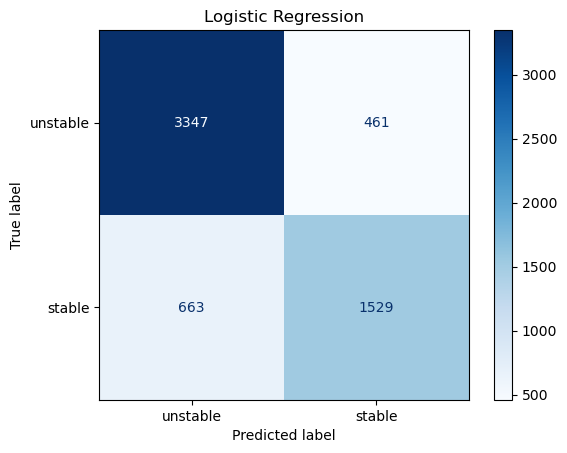

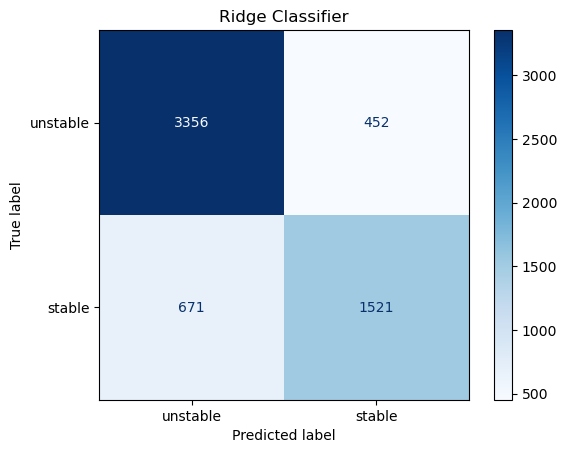

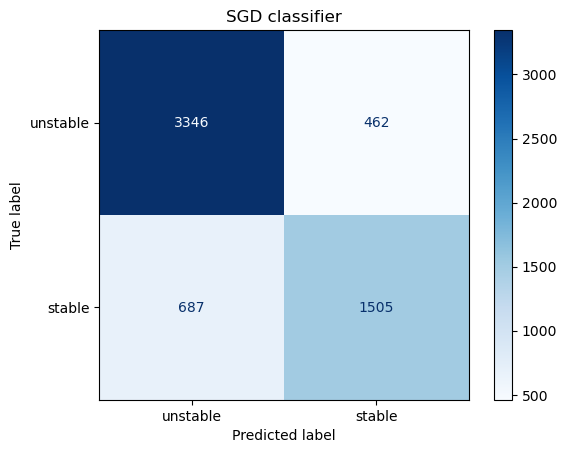

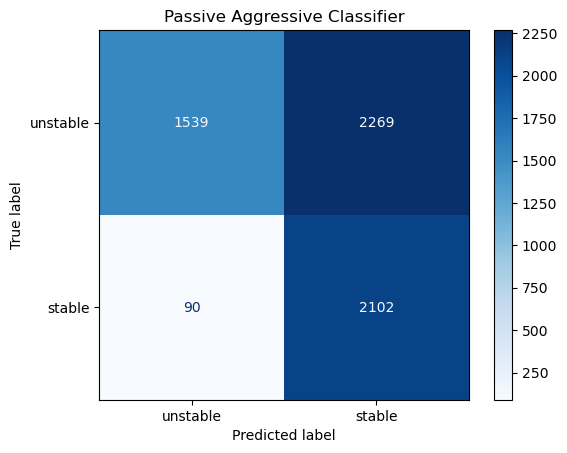

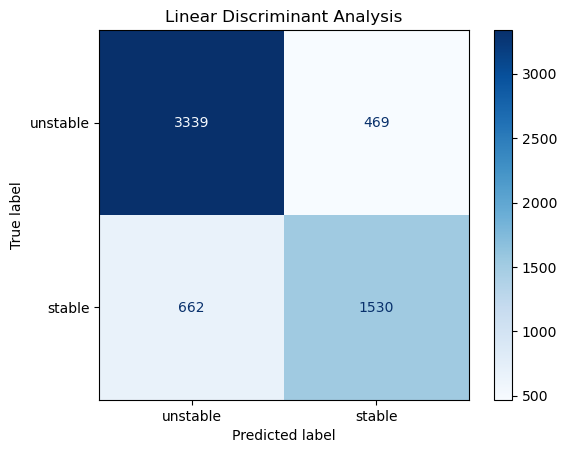

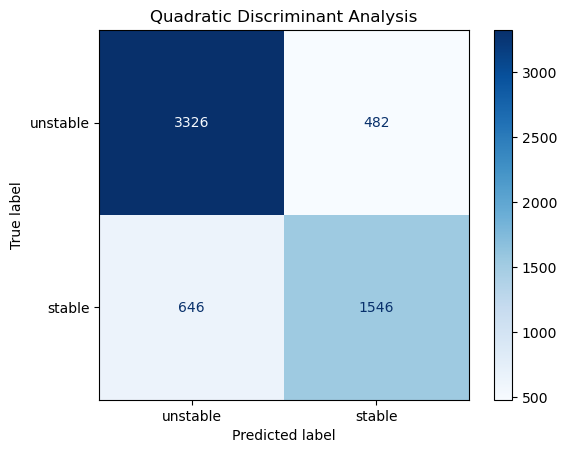

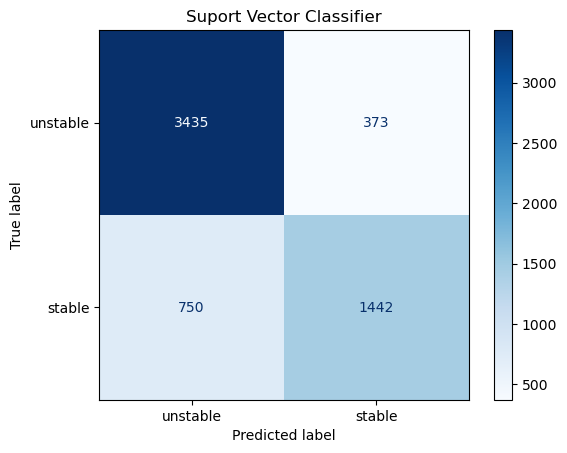

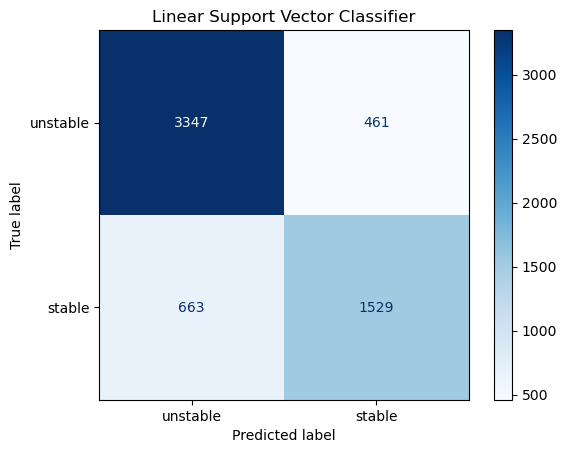

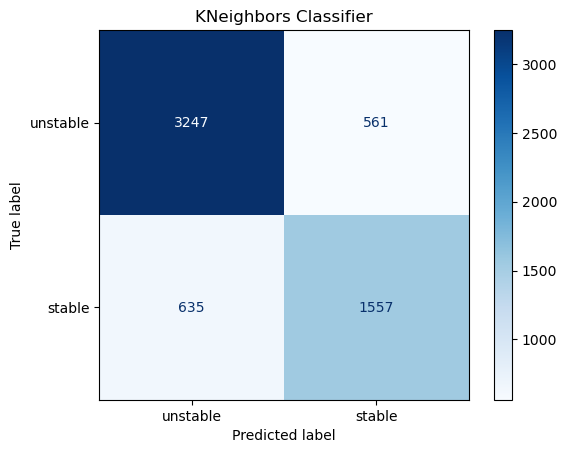

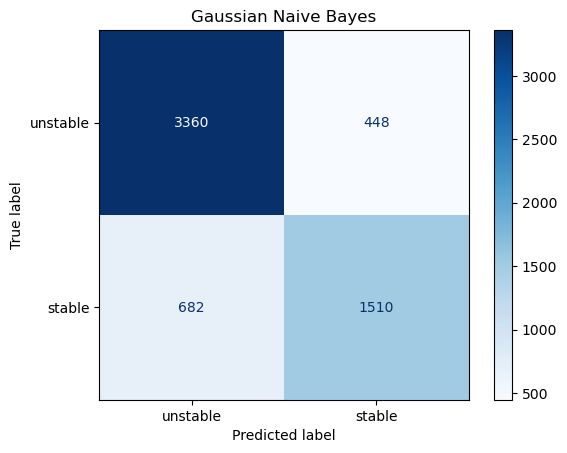

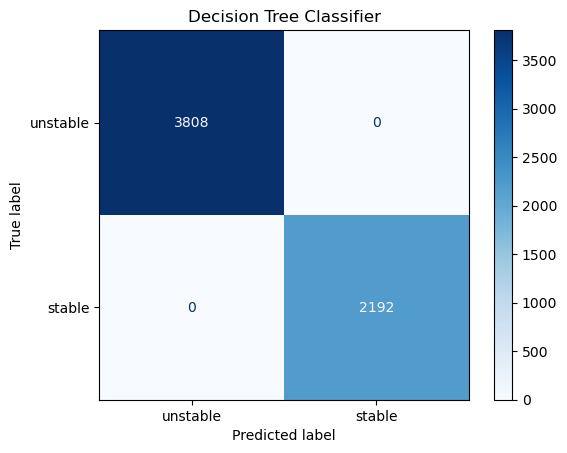

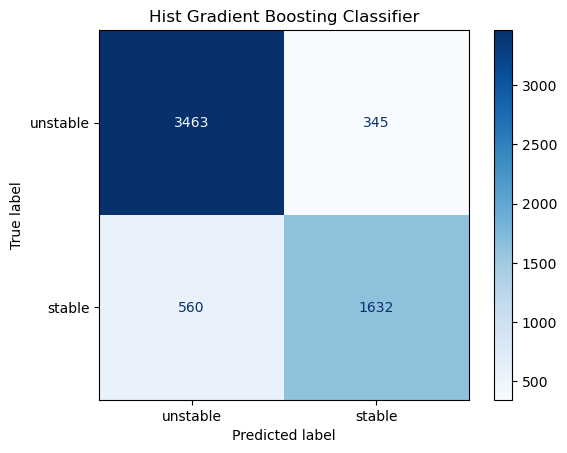

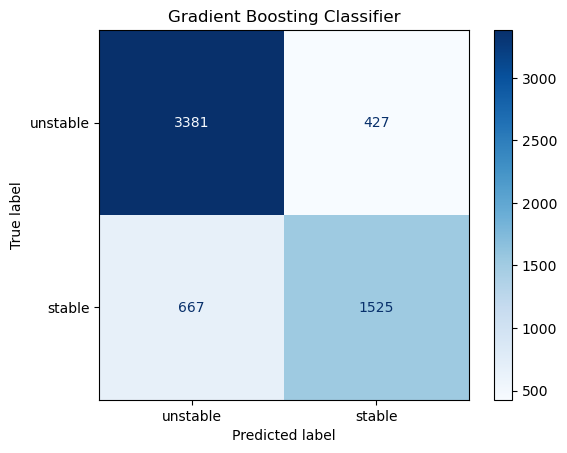

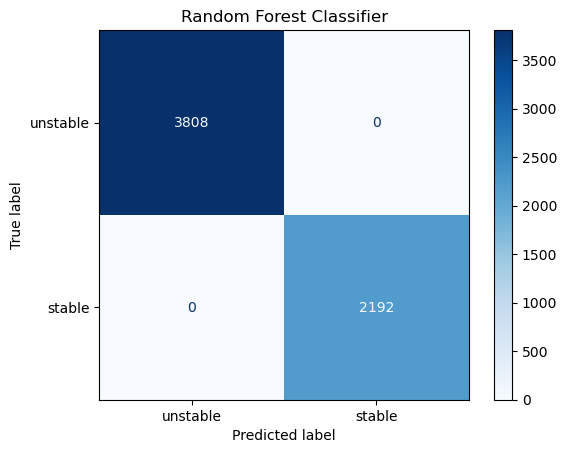

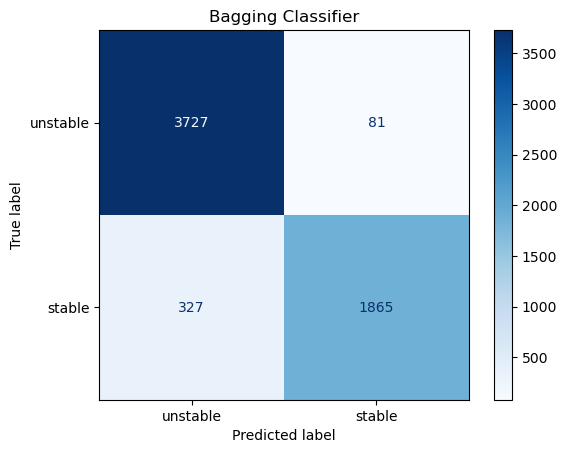

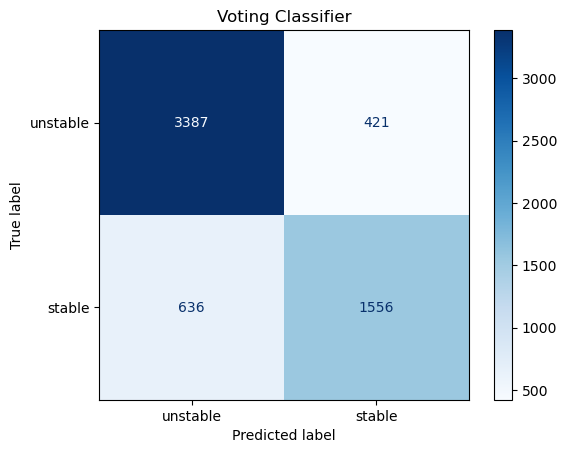

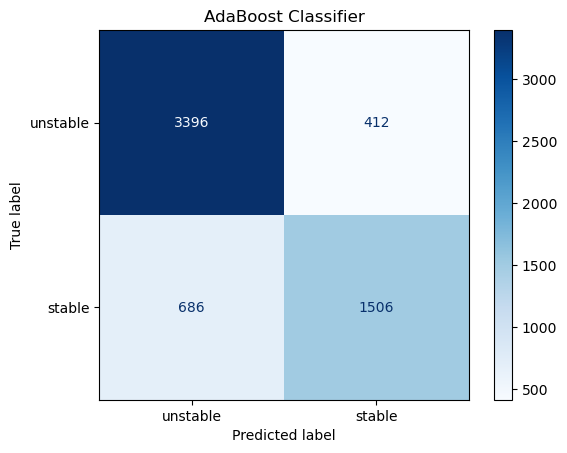

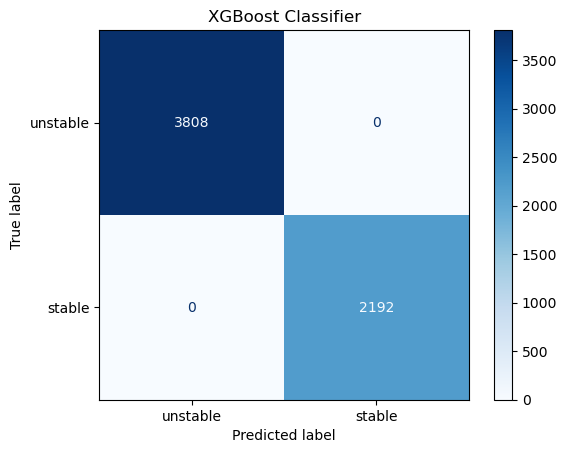

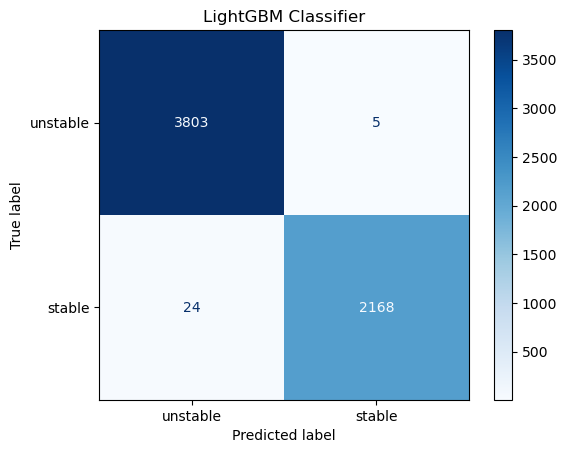

In [202]:
plt.figure()
plt.tight_layout()
for n, cm in enumerate(cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['unstable', 'stable'])
    disp.plot(cmap='Blues')
    plt.title(list(models.keys())[n])

In [203]:
PCA_training_table

Accuracy       MAE  Precision    Recall  \
Logistic Regression                0.812667  0.187333   0.768342  0.697536   
Ridge Classifier                   0.812833  0.187167   0.770907  0.693887   
SGD classifier                     0.808500  0.191500   0.765125  0.686588   
Passive Aggressive Classifier      0.606833  0.393167   0.480897  0.958942   
Linear Discriminant Analysis       0.811500  0.188500   0.765383  0.697993   
Quadratic Discriminant Analysis    0.812000  0.188000   0.762327  0.705292   
Suport Vector Classifier           0.812833  0.187167   0.794490  0.657847   
Linear Support Vector Classifier   0.812667  0.187333   0.768342  0.697536   
KNeighbors Classifier              0.800667  0.199333   0.735127  0.710310   
Gaussian Naive Bayes               0.811667  0.188333   0.771195  0.688869   
Decision Tree Classifier           1.000000  0.000000   1.000000  1.000000   
Hist Gradient Boosting Classifier  0.849167  0.150833   0.825493  0.744526   
Gradient Boosting Classifier       0.817667  0.182333   0.781250  0.695712   
Random Forest Classifier           1.000000  0.000000   1.000000  1.000000   
Bagging Classifier                 0.932000  0.068000   0.958376  0.850821   
Voting Classifier                  0.823833  0.176167   0.787051  0.709854   
AdaBoost Classifier                0.817000  0.183000   0.785193  0.687044   
XGBoost Classifier                 1.000000  0.000000   1.000000  1.000000   
LightGBM Classifier                0.995167  0.004833   0.997699  0.989051   

                                         F1  
Logistic Regression                0.731229  
Ridge Classifier                   0.730372  
SGD classifier                     0.723732  
Passive Aggressive Classifier      0.640561  
Linear Discriminant Analysis       0.730136  
Quadratic Discriminant Analysis    0.732701  
Suport Vector Classifier           0.719740  
Linear Support Vector Classifier   0.731229  
KNeighbors Classifier              0.722506  
Gaussian Naive Bayes               0.727711  
Decision Tree Classifier           1.000000  
Hist Gradient Boosting Classifier  0.782922  
Gradient Boosting Classifier       0.736004  
Random Forest Classifier           1.000000  
Bagging Classifier                 0.901402  
Voting Classifier                  0.746462  
AdaBoost Classifier                0.732847  
XGBoost Classifier                 1.000000  
LightGBM Classifier                0.993356

In [204]:
scores_df = pd.DataFrame(model_scores_dict, index=list(models.keys()))
scores_df.to_csv('Scores.csv')

In [205]:
scores_df

Standard Training Correlation Based  \
Logistic Regression                          81.58%            81.32%   
Ridge Classifier                             81.47%            81.40%   
SGD classifier                               81.20%            81.22%   
Passive Aggressive Classifier                79.22%            77.67%   
Linear Discriminant Analysis                 81.57%            81.37%   
Quadratic Discriminant Analysis              87.73%            87.62%   
Suport Vector Classifier                     97.97%            98.65%   
Linear Support Vector Classifier             81.57%            81.33%   
KNeighbors Classifier                        89.87%            93.83%   
Gaussian Naive Bayes                         83.38%            83.78%   
Decision Tree Classifier                     90.05%            90.07%   
Hist Gradient Boosting Classifier            96.28%            96.35%   
Gradient Boosting Classifier                 93.30%            93.23%   
Random Forest Classifier                     95.10%            95.85%   
Bagging Classifier                           83.80%            81.88%   
Voting Classifier                            84.68%            84.77%   
AdaBoost Classifier                          86.13%            86.42%   
XGBoost Classifier                           98.65%            98.55%   
LightGBM Classifier                          99.75%            99.42%   

                                  Kmeans Clustering Based  \
Logistic Regression                                81.72%   
Ridge Classifier                                   81.77%   
SGD classifier                                     81.75%   
Passive Aggressive Classifier                      76.20%   
Linear Discriminant Analysis                       81.70%   
Quadratic Discriminant Analysis                    87.50%   
Suport Vector Classifier                           97.95%   
Linear Support Vector Classifier                   81.72%   
KNeighbors Classifier                              90.22%   
Gaussian Naive Bayes                               83.93%   
Decision Tree Classifier                           90.18%   
Hist Gradient Boosting Classifier                  96.55%   
Gradient Boosting Classifier                       93.25%   
Random Forest Classifier                           95.25%   
Bagging Classifier                                 85.28%   
Voting Classifier                                  85.08%   
AdaBoost Classifier                                86.45%   
XGBoost Classifier                                 98.60%   
LightGBM Classifier                                99.58%   

                                  Mutual Information Regression Based  \
Logistic Regression                                            65.25%   
Ridge Classifier                                               65.30%   
SGD classifier                                                 62.77%   
Passive Aggressive Classifier                                  59.10%   
Linear Discriminant Analysis                                   65.08%   
Quadratic Discriminant Analysis                                68.02%   
Suport Vector Classifier                                       68.27%   
Linear Support Vector Classifier                               65.30%   
KNeighbors Classifier                                          69.23%   
Gaussian Naive Bayes                                           65.78%   
Decision Tree Classifier                                      100.00%   
Hist Gradient Boosting Classifier                              75.28%   
Gradient Boosting Classifier                                   70.20%   
Random Forest Classifier                                      100.00%   
Bagging Classifier                                             92.88%   
Voting Classifier                                              67.32%   
AdaBoost Classifier                                            68.40%   
XGBoost Classifier                    

In [211]:
df= pd.read_csv("data\\smart_grid_stability_augmented.csv")
df.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [265]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [212]:
map = {'unstable': 0, 'stable': 1}

In [213]:
df['stabf'] = df['stabf'].replace(map)
df.head()

C:\Users\ashis\AppData\Local\Temp\ipykernel_22836\1138321750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stabf'] = df['stabf'].replace(map)


tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347      0  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957      1  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471      0  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871      0  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860      0

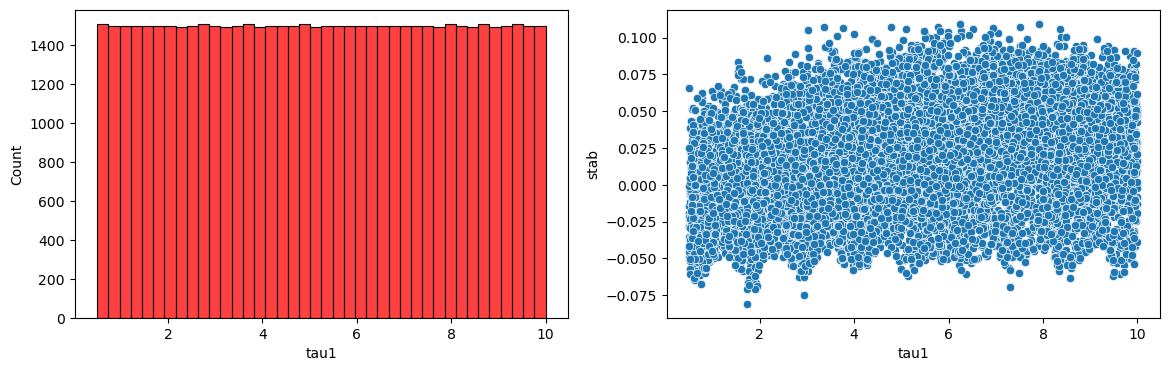

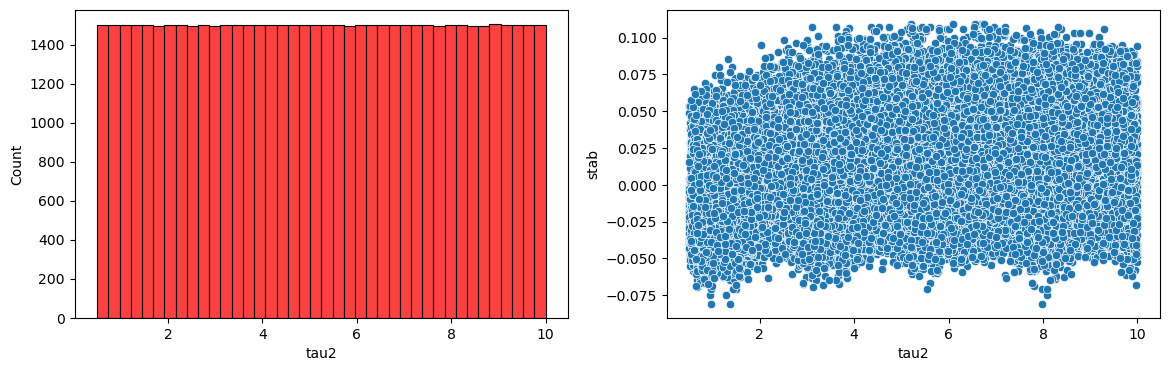

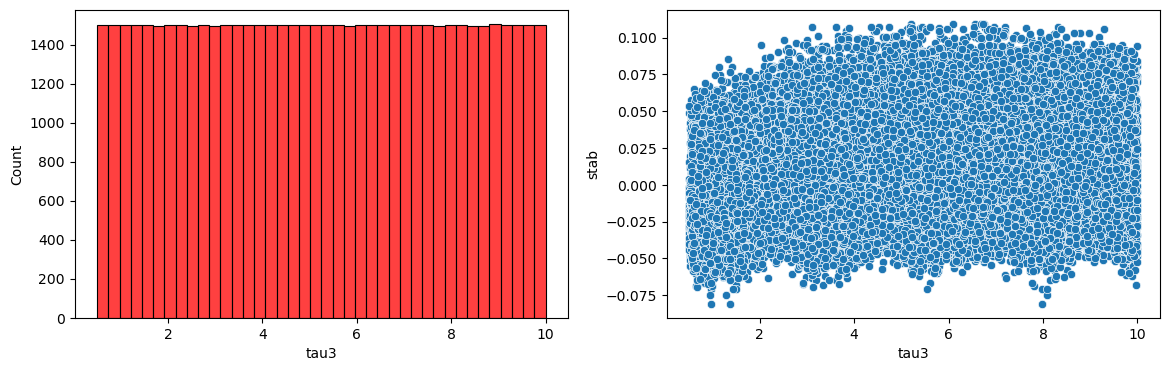

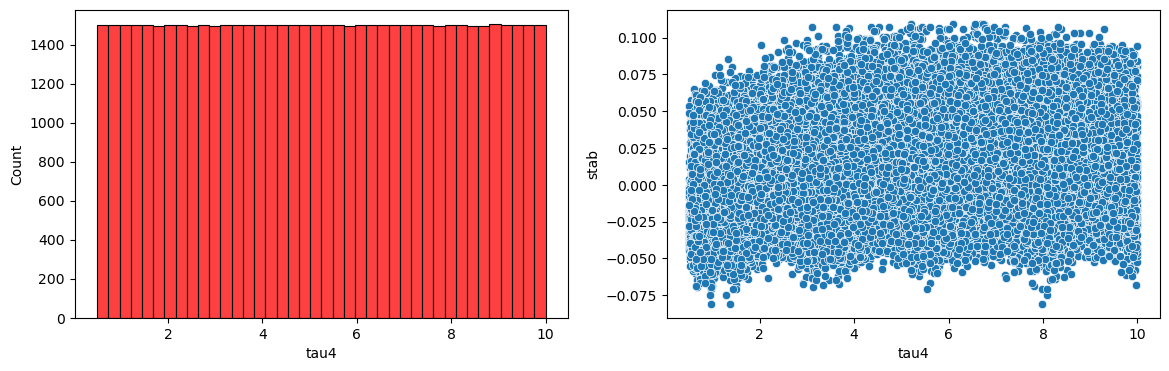

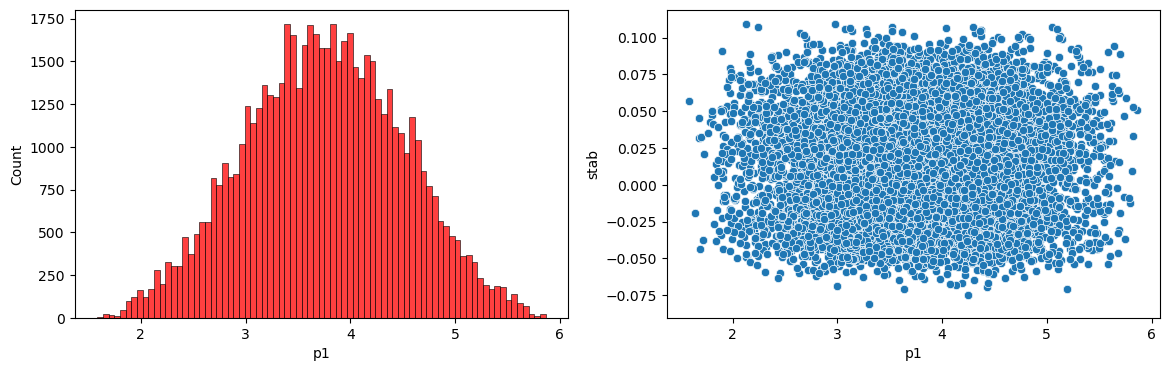

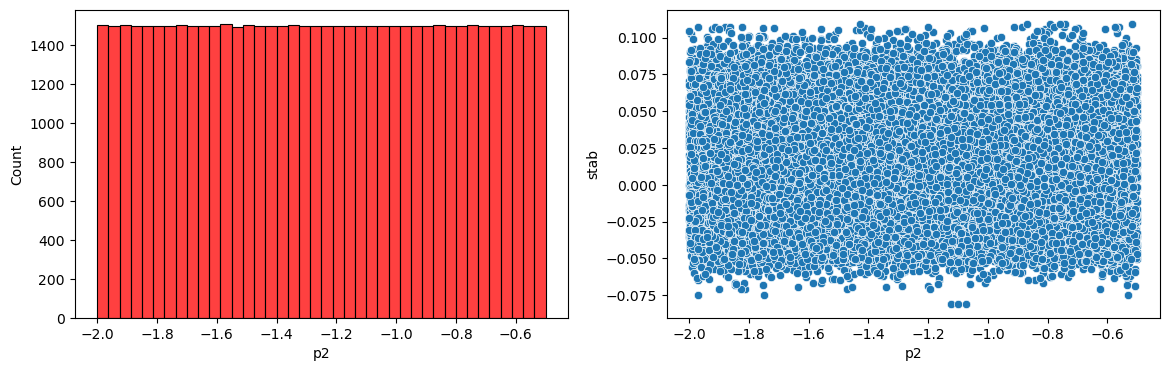

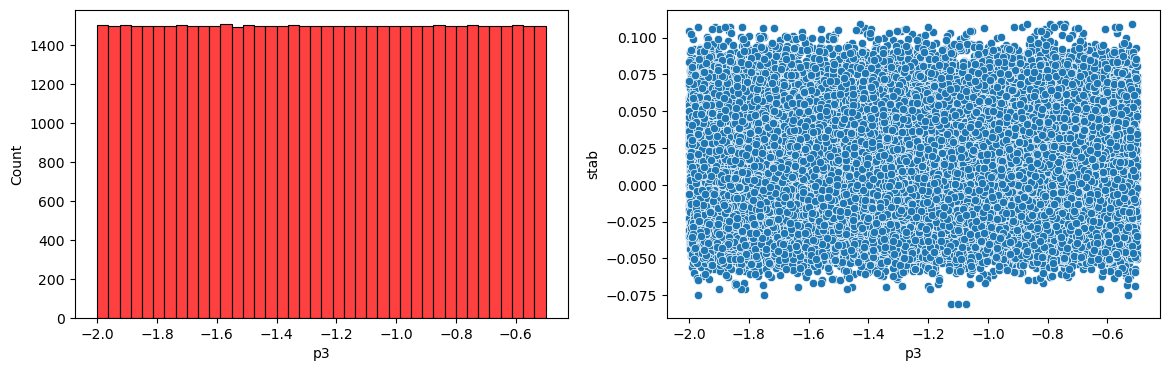

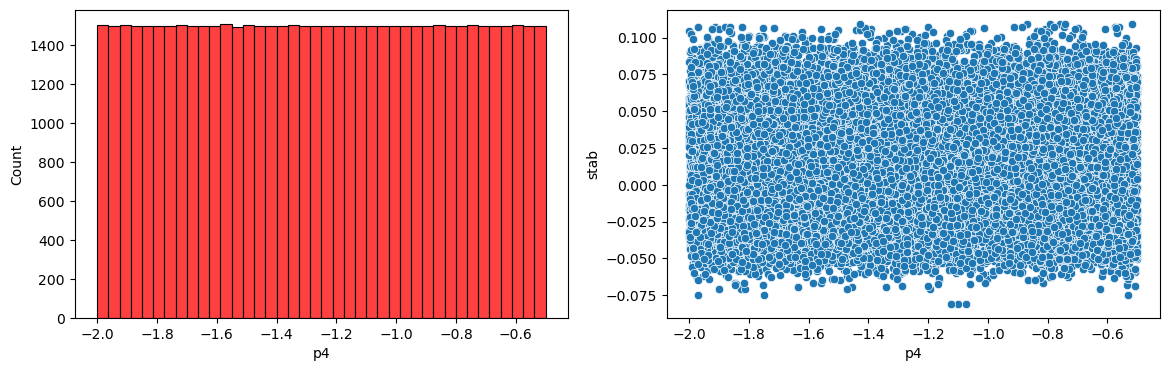

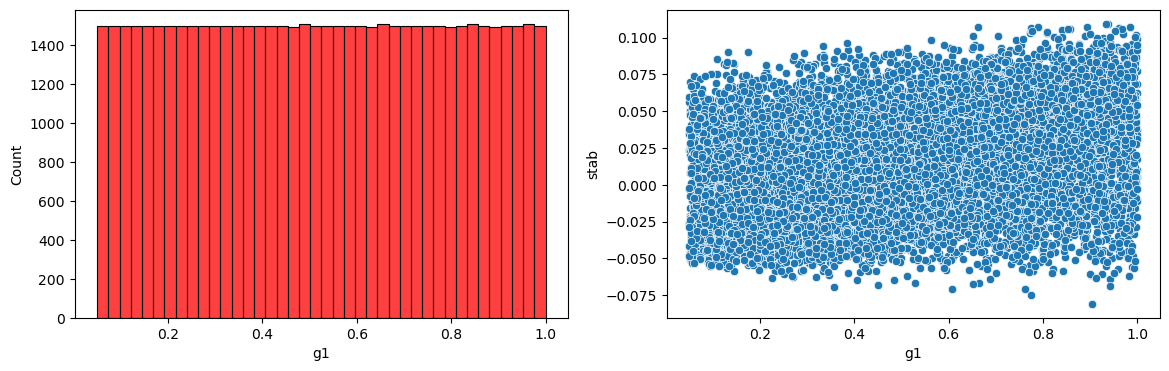

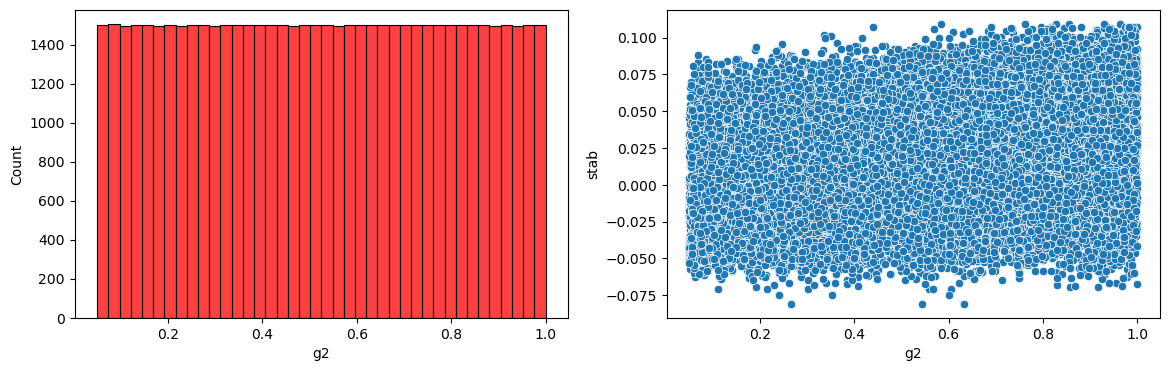

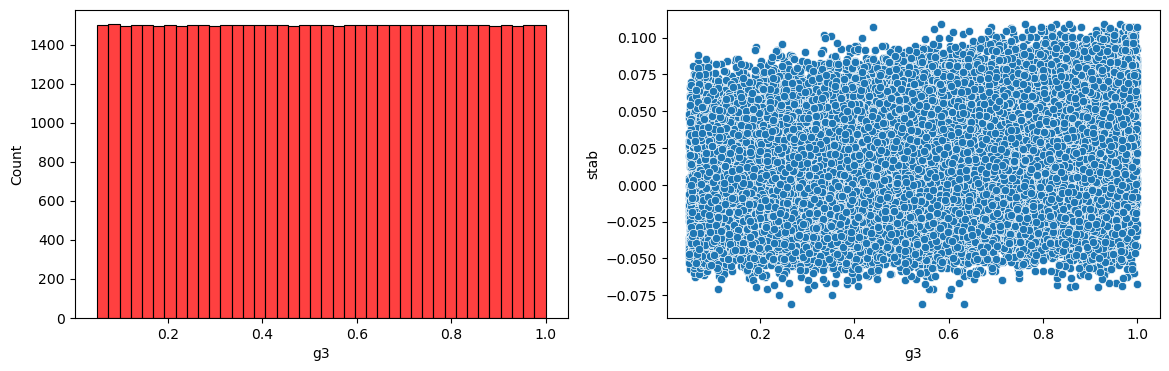

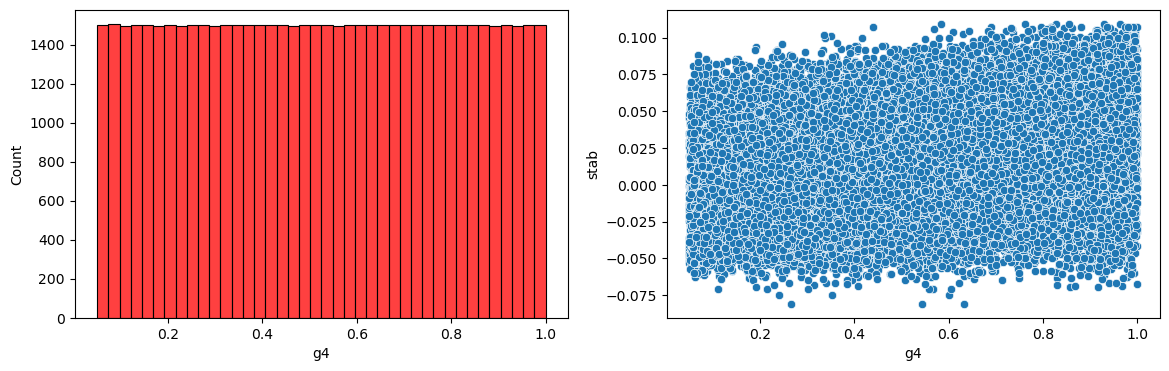

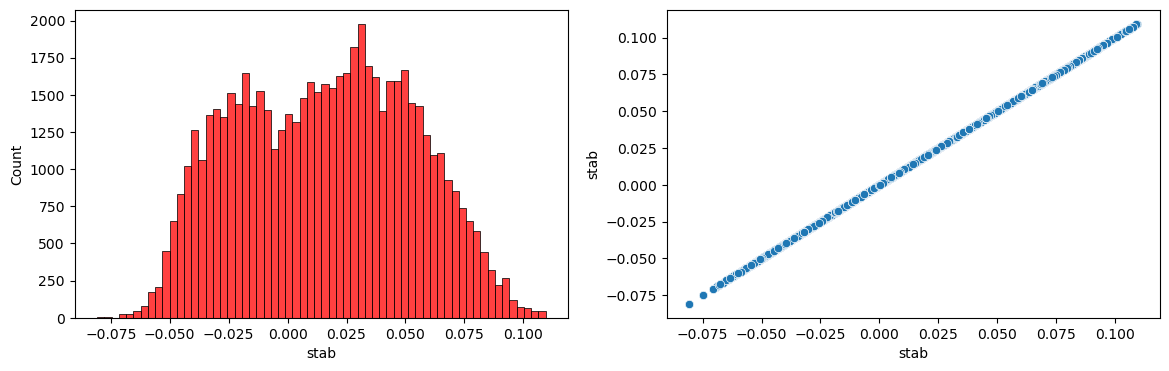

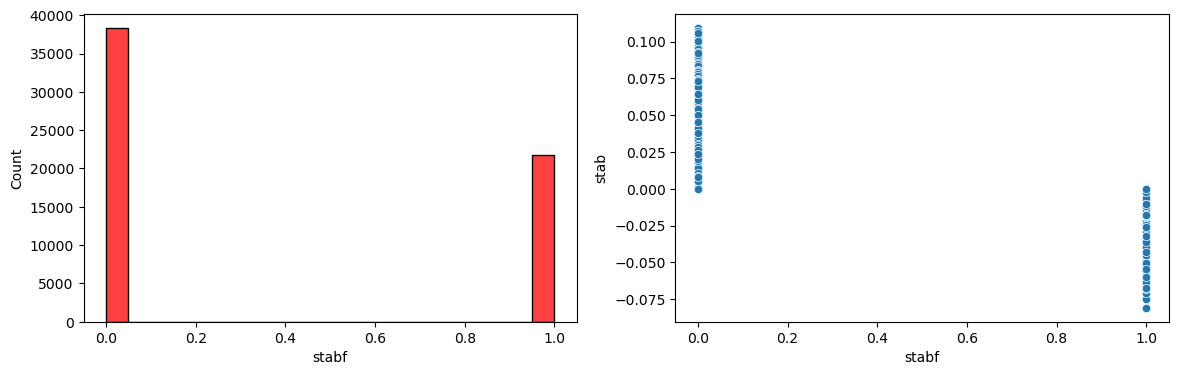

In [214]:
for column in df:
    plot_fig, plot_axes = plt.subplots(1, 2, figsize = (14, 4))
    chart_1 = sns.histplot(x=df[column], ax = plot_axes[0], color='r')

    chart_2 = sns.scatterplot(x = column, y = 'stab', data = df, ax = plot_axes[1])

    plt.show()
del plot_fig, plot_axes

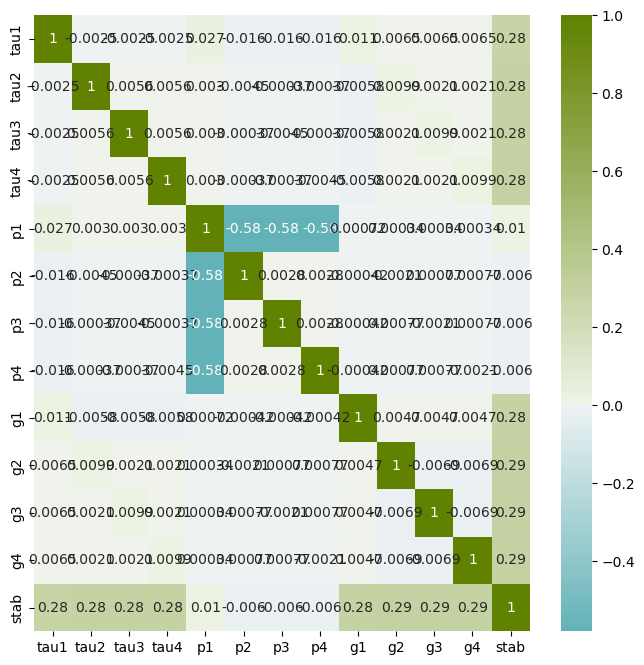

In [215]:
corr_data = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))
color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
sns.heatmap(corr_data.drop(columns=['stabf'], index=['stabf']), cmap=color_map, annot=True, ax = ax, center=0.00000)
plt.show()
del corr_data

In [216]:
df.dropna()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3        g4      stab  stabf  
0     -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347      0  
1     -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957      1  
2     -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471      0  
3     -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871      0  
4     -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860      0  
...         ...       ...       ...       ...       ...       ...    ...  
59995 -1.236256  0.601709  0.813512  0.779642  0.608385  0.023892      0  
59996 -1.733414  0.502079  0.285880  0.567242  0.366120 -0.025803      1  
59997 -1.975373  0.487838  0.149286  0.986505  0.145984 -0.031810      1  
59998 -0.898510  0.365246  0.889118  0.587558  0.818391  0.037789      0  
59999 -0.570329  0.073056  0.378761  0.505441  0.942631  0.045263      0  

[60000 rows x 14 columns]

In [217]:
y = df.iloc[:, -1]
X = df.drop('stabf', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 156)

In [218]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
pca = PCA(n_components=2)
x2d = pca.fit_transform(X_imputed)
x2d_df = pd.DataFrame(x2d)

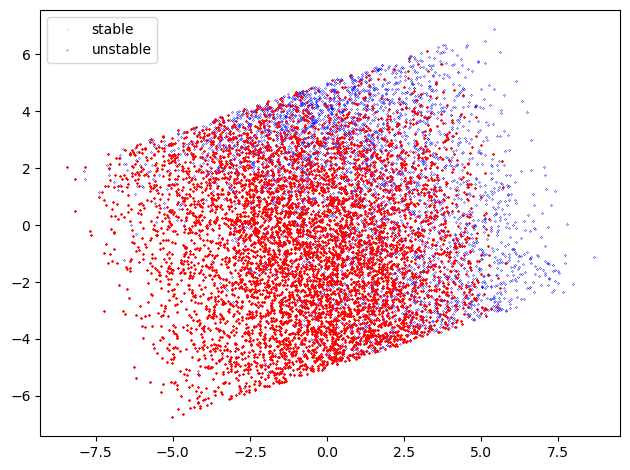

In [219]:
plt.plot(x2d_df[0][y==1], x2d_df[1][y==1], 'b.', ms=0.16, label='stable')
plt.plot(x2d_df[0][y==0], x2d_df[1][y==0], 'r.', ms=0.6, label='unstable')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [220]:
X_train.shape, y_train.shape

((48000, 13), (48000,))

In [221]:
X_test.shape, y_test.shape

((6000, 13), (6000,))

In [245]:
from xgboost import XGBRegressor

In [247]:
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
     

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [249]:
test_predictions =xgb_model.predict(X_test)
train_predictions = xgb_model.predict(X_train)

In [251]:
xgb_model.score(X_train,y_train)

0.999999243856828

In [253]:
xgb_model.score(X_test,y_test)

0.9999970943992371

In [267]:
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)

SVC(kernel='linear')

In [268]:
test_predictions = sv.predict(X_test)
train_predictions = sv.predict(X_train)

In [269]:
sv.score(X_train,y_train)

0.9841875

In [270]:
sv.score(X_test,y_test)

0.9851666666666666

In [271]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3801
           1       0.98      0.97      0.98      2199

    accuracy                           0.99      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000



In [272]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
     

LogisticRegression()

In [273]:
test_predictions = log_reg.predict(X_test)
train_predictions = log_reg.predict(X_train)

In [274]:
log_reg.score(X_train,y_train)

0.96175

In [275]:
log_reg.score(X_test,y_test)

0.9608333333333333

In [276]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3801
           1       0.95      0.94      0.95      2199

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



In [277]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [278]:
test_predictions = knn.predict(X_test)
train_predictions = knn.predict(X_train)
     

In [279]:
knn.score(X_train,y_train)

0.8938958333333333

In [280]:
knn.score(X_test,y_test)

0.8225

In [281]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3801
           1       0.78      0.72      0.75      2199

    accuracy                           0.82      6000
   macro avg       0.81      0.80      0.81      6000
weighted avg       0.82      0.82      0.82      6000



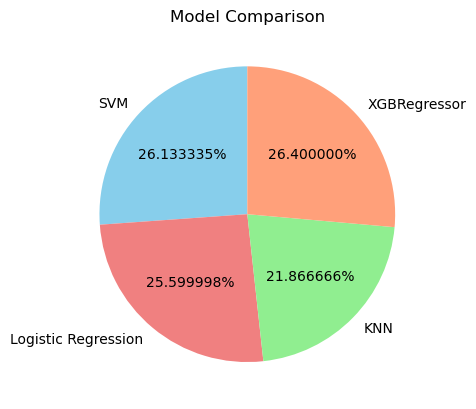

In [282]:
model_names = ['SVM', 'Logistic Regression', 'KNN', 'XGBRegressor']
accuracy_values = [0.98, 0.96, 0.82, 0.99]
plt.pie(accuracy_values, labels=model_names, autopct='%1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Model Comparison')
plt.show()


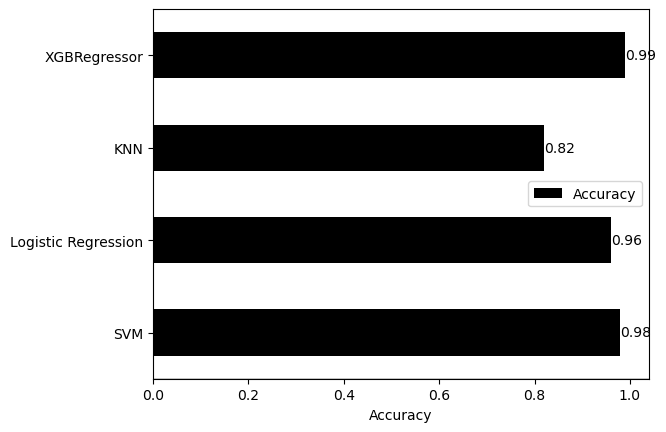

In [283]:
model_names = ['SVM', 'Logistic Regression', 'KNN', 'XGBRegressor']
accuracy_values = [0.98, 0.96, 0.82, 0.99]
indices = np.arange(len(model_names))
bar_width = 0.5
bars = plt.barh(indices, accuracy_values, height=bar_width, color='black', label='Accuracy')
plt.xlabel('Accuracy')
plt.yticks(indices, model_names)
plt.legend()
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{accuracy:.2f}', color='black', ha='left', va='center')
plt.ylim(-0.5, len(model_names) - 0.5)
plt.axhline(y=-0.5, color='black', linewidth=1)
plt.show()